In [1]:
import pandas as pd
import numpy as np
import sys
from joblib import Parallel, delayed
sys.path.append('/mydata/watres/quentin/code/FLOW/hourly_analysis/')
import GAMCR
data_folder = '/mydata/watres/quentin/code/FLOW/hourly_analysis/RES_GAMCR/real_data/'
save_folder = '/mydata/watres/quentin/code/FLOW/hourly_analysis/RES_GAMCR/real_data_pred/LOO/save/'
import os
import pickle
import matplotlib.pyplot as plt
import copy
import torch

/tmp/ipykernel_50090/4091513914.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
all_GISID = [file[6:-4] for file in os.listdir(save_folder) if 'GISID' in file]

In [3]:
#all_GISID = np.load(os.path.join('/mydata/watres/quentin/code/FLOW/hourly_analysis/RES_GAMCR/real_data_pred/', 'GISID_with_test_NSE_above_30percent.npy'))
feat_space, all_GISID, dffeat = GAMCR.dataset.get_feat_space(all_GISID=all_GISID, get_df=True, normalize=False)

feat_space = copy.deepcopy(dffeat.to_numpy())

In [4]:
features2count = {feat: 0 for feat in dffeat.columns.values}
features2weight = {feat: 0 for feat in dffeat.columns.values}

In [5]:
if False:
    features2count = {feat: 0 for feat in df.columns.values}
    features2weight = {feat: 0 for feat in df.columns.values}
    with open('/mydata/watres/quentin/code/FLOW/hourly_analysis/splimodel/PSL_models/grouplasso/saveLOO/GISID_{0}.pkl'.format(all_GISID[0]), 'rb') as handle:
        dico = pickle.load(handle)
    Qhat = dico['Qhat'][-5000:].reshape(1,-1)
    Qtrue = dico['Qtrue'][-5000:].reshape(1,-1)
    Qpred = dico['Qpred'][-5000:].reshape(1,-1)
    Hpred = dico['Hpred'].reshape(1,-1)
    Hhat = dico['Hhat'].reshape(1,-1)
    features2count = {feat: 0 for feat in df.columns.values}
    features2weight = {feat: 0 for feat in df.columns.values}
    for i in range(len(weights)):
        features2count[selected_feats[i]] += 1
        features2weight[selected_feats[i]] += weights[i]
    from tqdm import tqdm
    for i in tqdm(range(1,len(all_GISID))):
        GISID = all_GISID[i]
        with open('/mydata/watres/quentin/code/FLOW/hourly_analysis/splimodel/PSL_models/grouplasso/saveLOO/GISID_{0}.pkl'.format(GISID), 'rb') as handle:
            dico = pickle.load(handle)
        selected_feats = copy.deepcopy(dico['selected_features'])
        weights = copy.deepcopy(dico['weights'])
        Qhat = np.concatenate((Qhat, dico['Qhat'][-5000:].reshape(1,-1)), axis=0)
        Qtrue = np.concatenate((Qtrue, dico['Qtrue'][-5000:].reshape(1,-1)), axis=0)
        Qpred = np.concatenate((Qpred, dico['Qpred'][-5000:].reshape(1,-1)), axis=0)
        Hpred = np.concatenate((Hpred, dico['Hpred'].reshape(1,-1)), axis=0)
        Hhat = np.concatenate((Hhat, dico['Hhat'].reshape(1,-1)), axis=0)
        del dico
        for i in range(len(weights)):
            features2count[selected_feats[i]] += 1
            features2weight[selected_feats[i]] += weights[i]
    df_Qhat = pd.DataFrame(data=Qhat, index=all_GISID, columns=[i for i in range(Qhat.shape[1])])
    df_Qhat.to_csv('/mydata/watres/quentin/code/FLOW/hourly_analysis/splimodel/PSL_models/grouplasso/saveLOO/Qhat.csv', index=True)
    df_Qtrue = pd.DataFrame(data=Qtrue, index=all_GISID, columns=[i for i in range(Qtrue.shape[1])])
    df_Qtrue.to_csv('/mydata/watres/quentin/code/FLOW/hourly_analysis/splimodel/PSL_models/grouplasso/saveLOO/Qtrue.csv', index=True)
    df_Qpred = pd.DataFrame(data=Qpred, index=all_GISID, columns=[i for i in range(Qpred.shape[1])])
    df_Qpred.to_csv('/mydata/watres/quentin/code/FLOW/hourly_analysis/splimodel/PSL_models/grouplasso/saveLOO/Qpred.csv', index=True)
    df_Hhat = pd.DataFrame(data=Hhat, index=all_GISID, columns=[i for i in range(Hhat.shape[1])])
    df_Hhat.to_csv('/mydata/watres/quentin/code/FLOW/hourly_analysis/splimodel/PSL_models/grouplasso/saveLOO/Hhat.csv', index=True)
    df_Hpred = pd.DataFrame(data=Hpred, index=all_GISID, columns=[i for i in range(Hpred.shape[1])])
    df_Hpred.to_csv('/mydata/watres/quentin/code/FLOW/hourly_analysis/splimodel/PSL_models/grouplasso/saveLOO/Hpred.csv', index=True)
    with open('/mydata/watres/quentin/code/FLOW/hourly_analysis/splimodel/PSL_models/grouplasso/saveLOO/features2count.pkl', 'wb') as handle:
        pickle.dump(features2count, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open('/mydata/watres/quentin/code/FLOW/hourly_analysis/splimodel/PSL_models/grouplasso/saveLOO/features2weight.pkl', 'wb') as handle:
        pickle.dump(features2weight, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
if True:
    from tqdm import tqdm
    for i in tqdm(range(len(all_GISID))):
        GISID = all_GISID[i]
        with open(os.path.join(save_folder, 'GISID_{0}.pkl'.format(GISID)), 'rb') as handle:
            dico = pickle.load(handle)
        selected_feats = copy.deepcopy(dico['selected_features'])
        weights = copy.deepcopy(dico['weights'])
        del dico
        for i in range(len(weights)):
            features2count[selected_feats[i]] += 1
            features2weight[selected_feats[i]] += weights[i]

100% 71/71 [00:00<00:00, 74.19it/s] 


/tmp/ipykernel_50090/950514439.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=90)


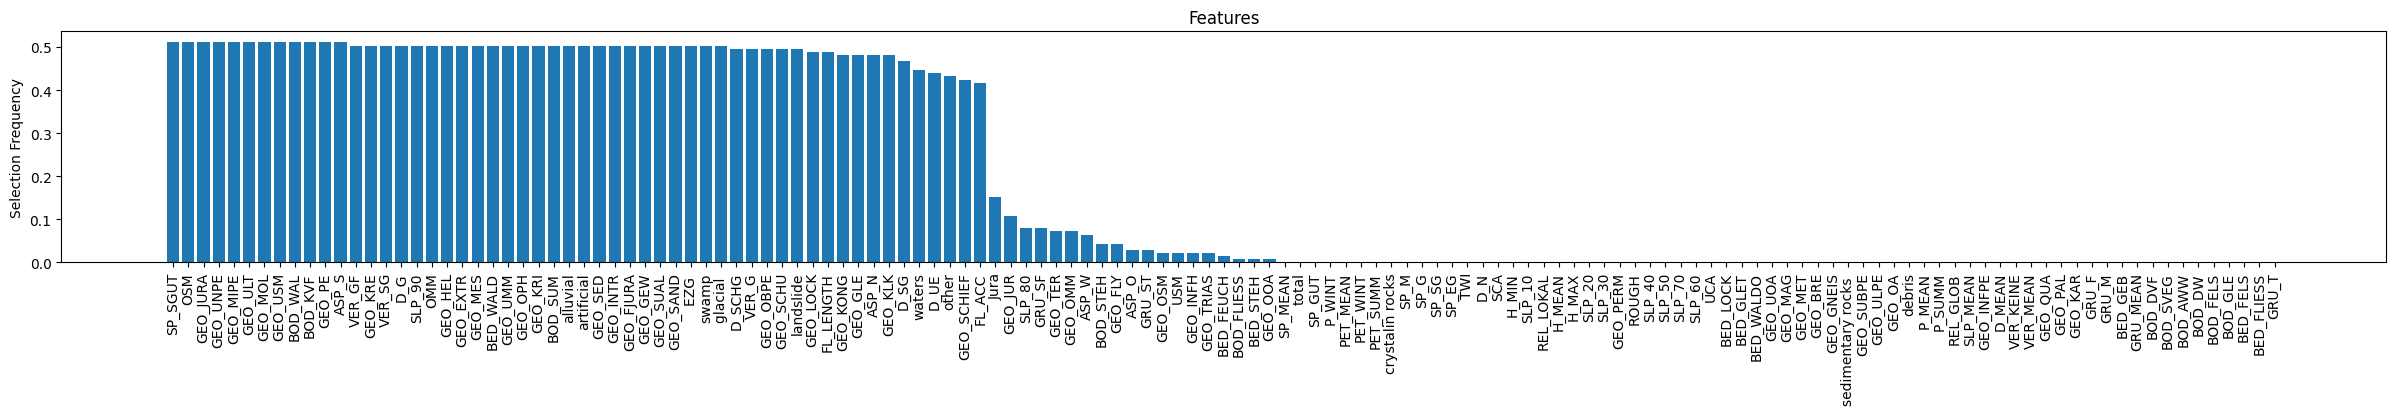

In [7]:
fig, ax = plt.subplots(figsize=(30,3))

labels = np.array(list(features2count.keys()))
counts = np.array(list(features2count.values())) / feat_space.shape[1]
idxs = np.flip(np.argsort(counts))
labels = labels[idxs]
counts = counts[idxs]
ax.bar(labels, counts)

ax.set_ylabel('Selection Frequency')
ax.set_title('Features')
ax.set_xticklabels(labels, rotation=90)
plt.savefig('selected_features.png', dpi=250, bbox_inches='tight')
plt.show()

/tmp/ipykernel_50090/827941108.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=90)


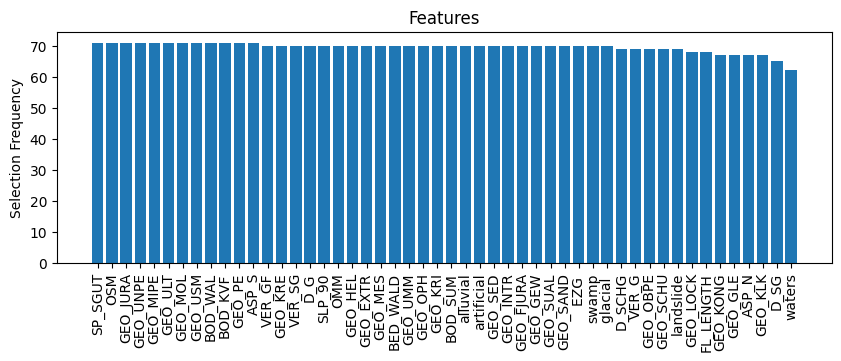

In [8]:
fig, ax = plt.subplots(figsize=(10,3))

labels = np.array(list(features2count.keys()))
counts = np.array(list(features2count.values()))
idxs = np.flip(np.argsort(counts))
labels = labels[idxs]
counts = counts[idxs]
ax.bar(labels[:50], counts[:50])

ax.set_ylabel('Selection Frequency')
ax.set_title('Features')
ax.set_xticklabels(labels, rotation=90)
plt.show()

/tmp/ipykernel_50090/1352061979.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=90)


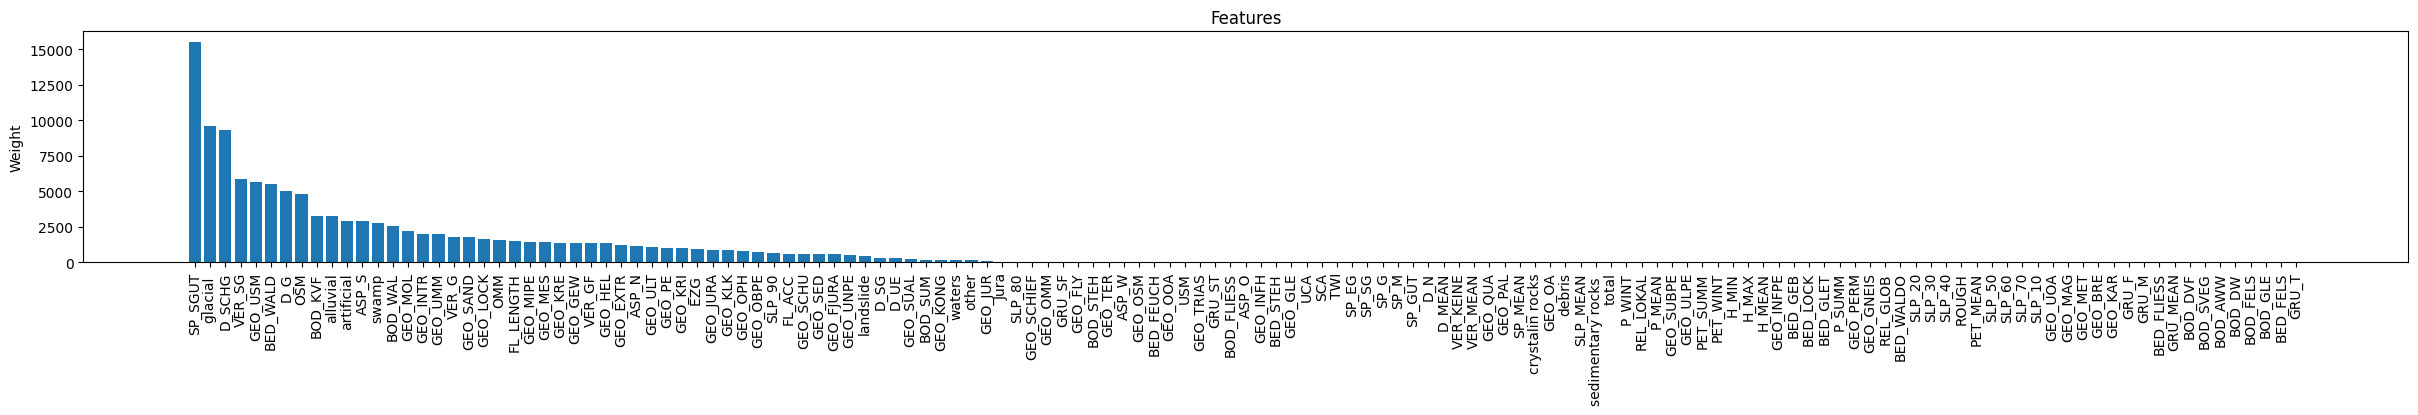

In [9]:
fig, ax = plt.subplots(figsize=(30,3))

labels = np.array(list(features2weight.keys()))
counts = np.array(list(features2weight.values()))
idxs = np.flip(np.argsort(counts))
labels = labels[idxs]
counts = counts[idxs]
ax.bar(labels, counts)

ax.set_ylabel('Weight')
ax.set_title('Features')
ax.set_xticklabels(labels, rotation=90)
plt.savefig('weights_features.png', dpi=250, bbox_inches='tight')
plt.show()

/tmp/ipykernel_50090/3346148252.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=90)


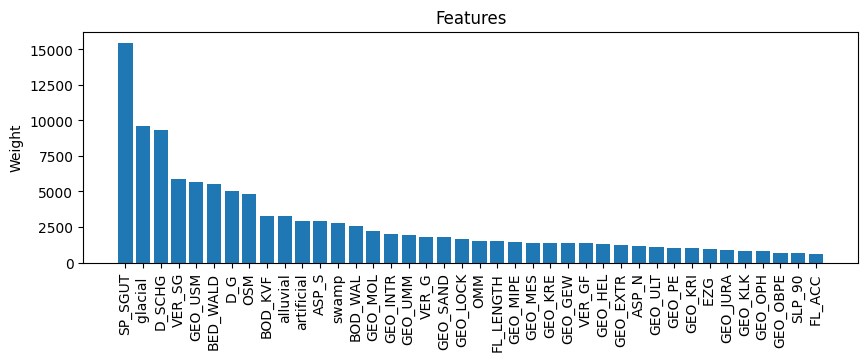

In [10]:
fig, ax = plt.subplots(figsize=(10,3))

labels = np.array(list(features2weight.keys()))
counts = np.array(list(features2weight.values()))
idxs = np.flip(np.argsort(counts))
labels = labels[idxs]
counts = counts[idxs]
ax.bar(labels[:40], counts[:40])

ax.set_ylabel('Weight')
ax.set_title('Features')
ax.set_xticklabels(labels, rotation=90)
plt.savefig('weights_40first_features.png', dpi=250, bbox_inches='tight')
plt.show()

# Regularization path

In [11]:
df = pd.read_csv('name_catchment_features.csv',encoding='utf-8') 
# Forward fill the NaN values in the first column
df['Type of Data'] = df['Type of Data'].fillna(method='ffill')
df = df.loc[:,['Type of Data', 'ID', 'Explanation']]
# Display the result
df.head()

/tmp/ipykernel_50090/3681976190.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Type of Data'] = df['Type of Data'].fillna(method='ffill')


Type of Data         ID                                        Explanation
0    Site size     GIS_ID  unique identifier - links  basin / gauge and data
1    Site size     org_ID  unique identifier - original  ID from BAFU & c...
2    Site size  Gewaesser                                      name of river
3    Site size    Station                                      name of gauge
4    Site size  Betreiber                                     source of data

In [34]:
color2cats = {
            'orange': ['CH 1:2500'],
            'yellowgreen': ['Land use'],
            'palegreen': ['Soil depth', 'Permeability', 'Storage capacity', 'Waterlogging'],
            'red': ['Site size'],
            'steelblue': ['Heights, inclination'],
            'skyblue': ['Runoff accumulation'],
            'gray': ['Climate data'],
            'gold': ['Ground cover'],
            'darkkhaki': ['Geology', 'unconsolidated material']
}

color2namecategory = {
            'orange': 'Quaternary Deposits',
            'yellowgreen': 'Land use',
            'palegreen': 'Soil depth, Permeability, Storage, Waterlogging',
            'red': 'Site size',
            'steelblue': 'Heights, inclination',
            'skyblue': 'Runoff accumulation',
            'gray': 'Climate data',
            'gold': 'Ground cover',
            'darkkhaki': 'Geology'
}

cat2color = {}
for color, ls_cats in color2cats.items():
    for cat in ls_cats:
        cat2color[cat] = color

In [35]:
X = copy.deepcopy(dffeat.to_numpy())

data_folder = '/mydata/watres/quentin/code/FLOW/hourly_analysis/RES_GAMCR/real_data/'
model = GAMCR.model.GAMCR(lam=1)
name_model = '{0}_best_model.pkl'.format(all_GISID[0])
save_folder_file =  os.path.join(data_folder,'{0}'.format(all_GISID[0]))
model.load_model(os.path.join(save_folder_file, name_model))

beta0 = model.gam.get_coeffs()

site2gamcoeffs = torch.zeros((len(all_GISID), beta0.shape[0]*beta0.shape[1]))

count = 0
train_GISID = []
idxs2keep = []
for i, GISID in enumerate(all_GISID):
    try:
        model = GAMCR.model.GAMCR(lam=1)
        name_model = '{0}_best_model.pkl'.format(GISID)
        save_folder_file =  os.path.join(data_folder,'{0}'.format(GISID))
        model.load_model(os.path.join(save_folder_file, name_model))
        beta0 = model.gam.get_coeffs().reshape(-1)
        site2gamcoeffs[count,:] = torch.tensor(copy.deepcopy(beta0)).float()
        site2gamcoeffs[count,:] = site2gamcoeffs[count,:] * (site2gamcoeffs[count,:]>0)
        count += 1
        train_GISID.append(GISID)
        idxs2keep.append(i)
    except:
        pass
X = X[np.array(idxs2keep).astype(int),:]
site2gamcoeffs = site2gamcoeffs[:len(idxs2keep),:]
norms = np.linalg.norm(X, axis=0)
centerings = {}
for j in range(X.shape[1]):
    centerings[j] = np.mean(X[:,j])
    if norms[j]>1e-3:
        X[:,j] = (X[:,j]-(np.mean(X[:,j])))/norms[j]
    else:
        X[:,j] = (X[:,j]-(np.mean(X[:,j])))

In [36]:
if False:
    np.save('/mydata/watres/quentin/code/FLOW/hourly_analysis/RES_GAMCR/real_data_pred/lasso_path_GISIDs.npy', train_GISID)
    np.save('/mydata/watres/quentin/code/FLOW/hourly_analysis/RES_GAMCR/real_data_pred/lasso_path_alphas.npy', alphas)
    np.save('/mydata/watres/quentin/code/FLOW/hourly_analysis/RES_GAMCR/real_data_pred/lasso_path_coefs.npy', coefs)
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.linear_model import MultiTaskLasso
    from sklearn.linear_model import lasso_path
    namefeatures = list(features2weight.keys())

    # Fit MultiTask Lasso
    alphas, coefs, _ = lasso_path(X, site2gamcoeffs)
else:
    namefeatures = list(features2weight.keys())

    train_GISID = np.load('/mydata/watres/quentin/code/FLOW/hourly_analysis/RES_GAMCR/real_data_pred/lasso_path_GISIDs.npy')
    alphas = np.load('/mydata/watres/quentin/code/FLOW/hourly_analysis/RES_GAMCR/real_data_pred/lasso_path_alphas.npy')
    coefs = np.load('/mydata/watres/quentin/code/FLOW/hourly_analysis/RES_GAMCR/real_data_pred/lasso_path_coefs.npy')

In [37]:
coefs.shape

(1210, 139, 100)

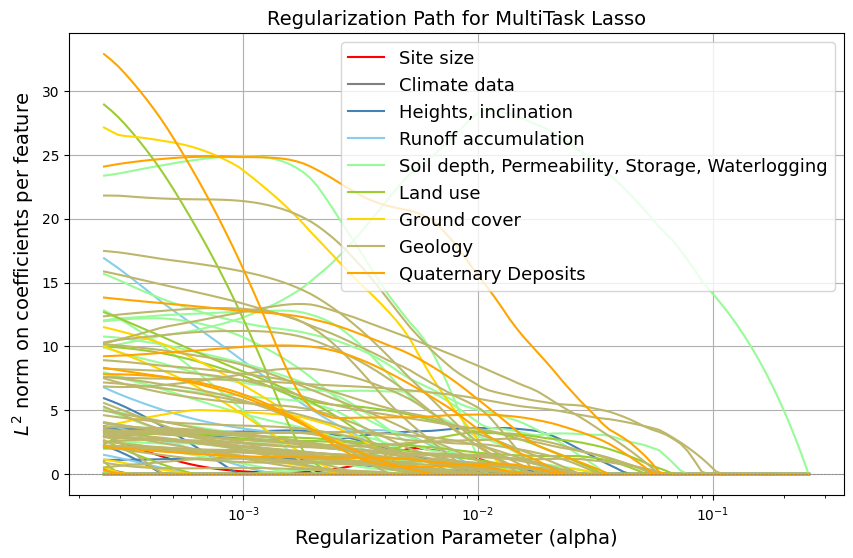

In [38]:
df['ID'] = df['ID'].apply(lambda x: x.strip())

# Plotting the regularization path
plt.figure(figsize=(10, 6))

color2bool = {color: False for color in color2cats.keys()}
for i in range(coefs.shape[1]):  # Iterate through features
    namefeature = namefeatures[i]
    cat = df[df['ID']==namefeature.strip()]['Type of Data'].iloc[0]
    color = None
    for col, ls_cats in color2cats.items():
        for catref in ls_cats:
            #print(catref, cat, catref.strip() in cat.strip())
            if catref.strip() in cat.strip():
                color = col
    if not(color2bool[color]):
        plt.plot(alphas, np.linalg.norm(coefs[:,i,:], axis=0), label=color2namecategory[color], color=color)
        color2bool[color] = True
    else:
        plt.plot(alphas, np.linalg.norm(coefs[:,i,:], axis=0), color=color)

plt.xscale('log')  # Use a logarithmic scale for alpha
plt.xlabel('Regularization Parameter (alpha)', fontsize=14)
plt.ylabel('$L^2$ norm on coefficients per feature', fontsize=14)
plt.title('Regularization Path for MultiTask Lasso', fontsize=14)
plt.axhline(0, color='grey', linestyle='--', lw=0.5)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

<>:25: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\#'
<>:25: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\#'
/tmp/ipykernel_50090/1734973683.py:25: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('Regularization Parameter ($\lambda$)', fontsize=14)
/tmp/ipykernel_50090/1734973683.py:26: SyntaxWarning: invalid escape sequence '\#'
  plt.ylabel('$\\frac{1}{\# category} \sum_{j \in category} \|K_{:,j}\|_2^2$', fontsize=14)


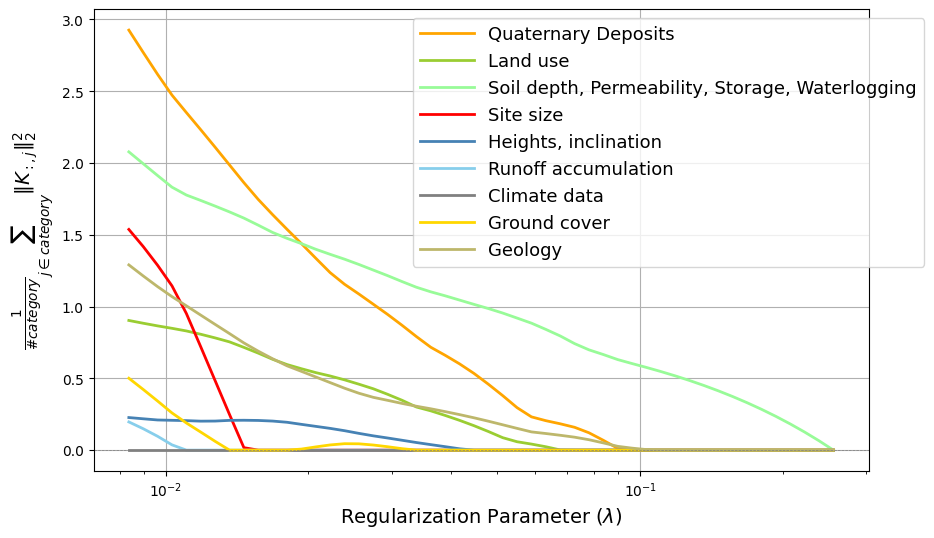

In [39]:
ZOOM = True

df['ID'] = df['ID'].apply(lambda x: x.strip())

# Plotting the regularization path
plt.figure(figsize=(10, 6))

color2idx_features = {color:[] for color in color2cats.keys()}
for i in range(coefs.shape[1]):  # Iterate through features
    namefeature = namefeatures[i]
    cat = df[df['ID']==namefeature.strip()]['Type of Data'].iloc[0]
    for col, ls_cats in color2cats.items():
        for catref in ls_cats:
            #print(catref, cat, catref.strip() in cat.strip())
            if catref.strip() in cat.strip():
                color2idx_features[col].append(i)
                
for color, ls_cats in color2cats.items():  # Iterate through features
    if ZOOM:
        plt.plot(alphas[:50], np.mean(np.linalg.norm(coefs, axis=0)[color2idx_features[color],:], axis=0)[:50], label=color2namecategory[color], color=color, linewidth=2)
    else:
        plt.plot(alphas, np.mean(np.linalg.norm(coefs, axis=0)[color2idx_features[color],:], axis=0), label=color2namecategory[color], color=color, linewidth=2)

plt.xscale('log')  # Use a logarithmic scale for alpha
plt.xlabel('Regularization Parameter ($\lambda$)', fontsize=14)
plt.ylabel('$\\frac{1}{\# category} \sum_{j \in category} \|K_{:,j}\|_2^2$', fontsize=14)
#plt.title('Regularization Path for MultiTask Lasso', fontsize=14)
plt.axhline(0, color='grey', linestyle='--', lw=0.5)
plt.legend(
    loc='upper left',          # Position
    bbox_to_anchor=(0.4, 1),     # Box anchor position (moves the box)
    borderaxespad=0.5,         # Padding between axes and legend
    handlelength=3,            # Length of the legend handles (adjusts width)
    fontsize=13,               # Font size
    frameon=True               # Adds a frame (box) around legend
)#plt.legend(title='Categories', fontsize=13, )
plt.grid(True)
plt.savefig('regu_path_cat_zoom.png',  dpi=250, bbox_inches='tight')
plt.show()

/tmp/ipykernel_50090/1932266682.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=90)


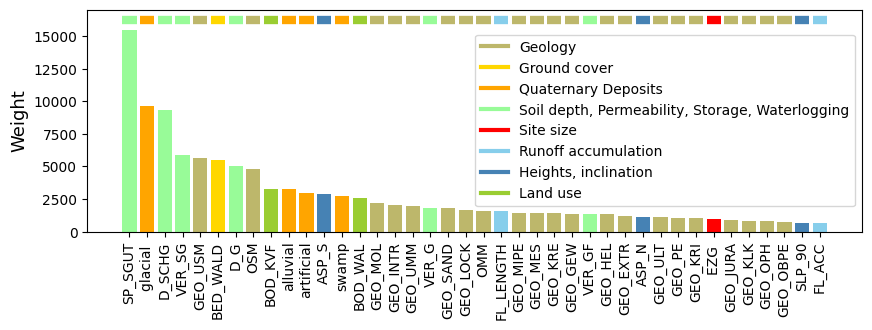

In [27]:
idx_feature2color = {i:'' for i in range(len(features2weight))}
for color, idxs in color2idx_features.items():
    for i in idxs:
        idx_feature2color[i] = color

fig, ax = plt.subplots(figsize=(10,3))

labels = np.array(list(features2weight.keys()))
counts = np.array(list(features2weight.values()))
idxs = np.flip(np.argsort(counts))
labels = labels[idxs]
counts = counts[idxs]
colors = [idx_feature2color[i] for i in idxs]
ax.bar(labels[:40], counts[:40], color=colors[:40])
for color in np.unique(colors[:40]):
    ax.plot([],[], color=color, label=color2namecategory[color], linewidth=3)


# Add colored horizontal lines just outside the plot (above the xticks)
for i, (label, color) in enumerate(zip(labels[:40], colors[:40])):
    # Adding a colored horizontal line outside the plot, above xticks
    ax.hlines(y=max(counts)*1.05, xmin=i - 0.4, xmax=i + 0.4, color=color, linewidth=6, clip_on=False)

# Adjust y-limits so the colored lines appear outside the plot
ax.set_ylim(0, max(counts) * 1.1)

# Move the plot upwards to leave space for the colored lines
plt.subplots_adjust(top=0.85)

ax.set_ylabel('Weight', fontsize=13)
#ax.set_title('Features', fontsize=13)
ax.set_xticklabels(labels, rotation=90)
plt.legend(loc=7)
plt.savefig('weights_40first_features.png', dpi=250, bbox_inches='tight')
plt.show()

/tmp/ipykernel_50090/4121119458.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=90)


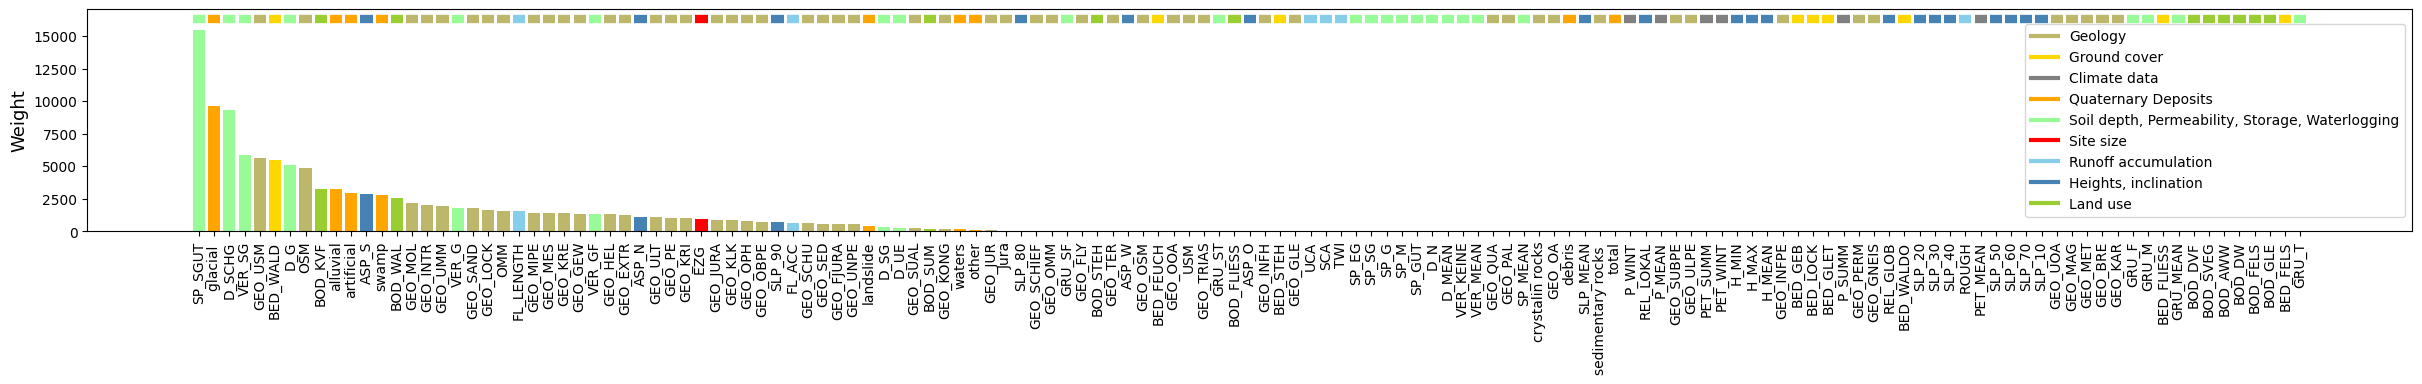

In [30]:
fig, ax = plt.subplots(figsize=(30,3))

labels = np.array(list(features2weight.keys()))
counts = np.array(list(features2weight.values()))
idxs = np.flip(np.argsort(counts))
labels = labels[idxs]
counts = counts[idxs]
colors = [idx_feature2color[i] for i in idxs]

ax.bar(labels, counts, color=colors)
for color in np.unique(colors):
    ax.plot([],[], color=color, label=color2namecategory[color], linewidth=3)

# Add colored horizontal lines just outside the plot (above the xticks)
for i, (label, color) in enumerate(zip(labels, colors)):
    # Adding a colored horizontal line outside the plot, above xticks
    ax.hlines(y=max(counts)*1.05, xmin=i - 0.4, xmax=i + 0.4, color=color, linewidth=6, clip_on=False)

# Adjust y-limits so the colored lines appear outside the plot
ax.set_ylim(0, max(counts) * 1.1)

# Move the plot upwards to leave space for the colored lines
plt.subplots_adjust(top=0.85)
    
ax.set_ylabel('Weight', fontsize=13)
ax.set_xticklabels(labels, rotation=90)
plt.legend(loc=7)
plt.savefig('weights_features.png', dpi=250, bbox_inches='tight')
plt.show()

/tmp/ipykernel_50090/2928351845.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=90)


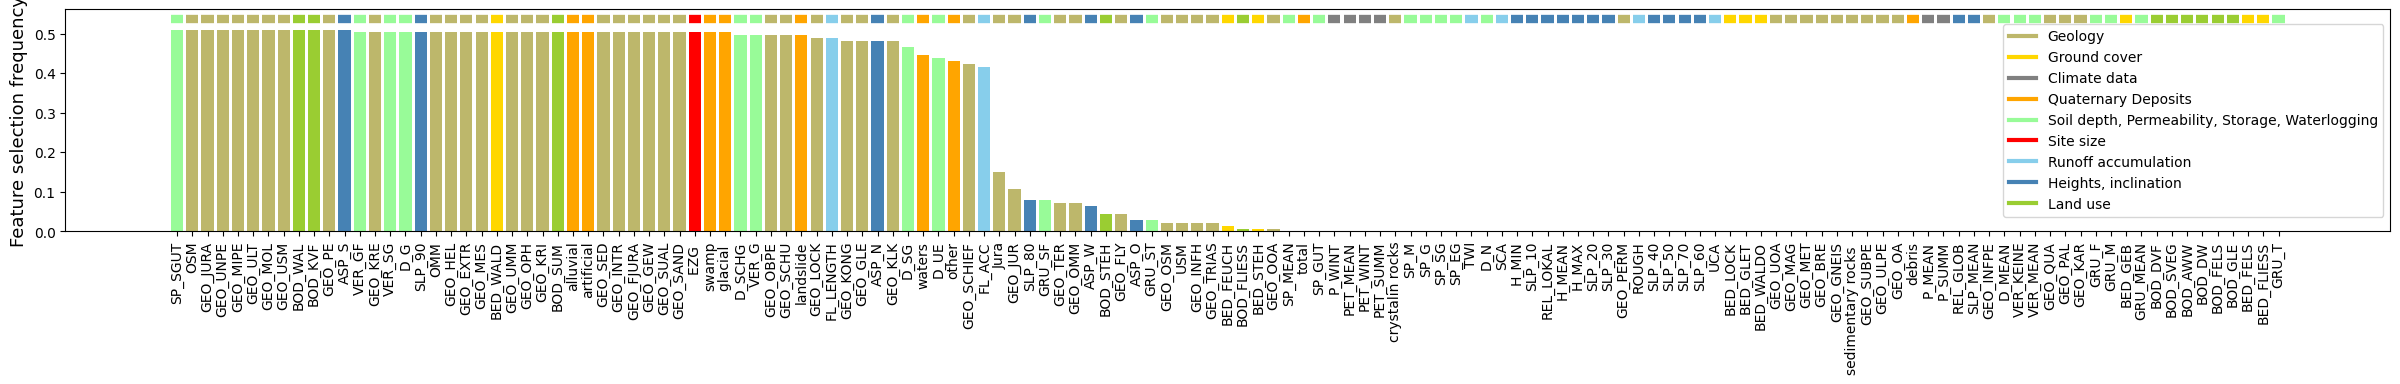

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming features2count, feat_space, colors, and color2namecategory are already defined

# Create figure and axis
fig, ax = plt.subplots(figsize=(30, 3))

# Prepare data
labels = np.array(list(features2count.keys()))
counts = np.array(list(features2count.values())) / feat_space.shape[1]
idxs = np.flip(np.argsort(counts))  # Sort based on counts
labels = labels[idxs]
counts = counts[idxs]
colors_sorted = [idx_feature2color[i] for i in idxs]

# Create bar plot
ax.bar(labels, counts, color=colors_sorted)

# Plot color legend for each unique color
for color in np.unique(colors_sorted):  # Assuming color2namecategory exists
    ax.plot([], [], color=color, label=color2namecategory[color], linewidth=3)

# Set axis labels
ax.set_ylabel('Feature selection frequency', fontsize=13)

# Rotate xtick labels
ax.set_xticklabels(labels, rotation=90)

# Add colored horizontal lines just outside the plot (above the xticks)
for i, (label, color) in enumerate(zip(labels, colors_sorted)):
    # Adding a colored horizontal line outside the plot, above xticks
    ax.hlines(y=max(counts)*1.05, xmin=i - 0.4, xmax=i + 0.4, color=color, linewidth=6, clip_on=False)

# Adjust y-limits so the colored lines appear outside the plot
ax.set_ylim(0, max(counts) * 1.1)

# Move the plot upwards to leave space for the colored lines
plt.subplots_adjust(top=0.85)

# Customize legend position
plt.legend(loc=7)

# Save and display plot
plt.savefig('selected_features.png', dpi=250, bbox_inches='tight')
plt.show()


# Comments
- The model does not select Condition-Specific Variables (also called Forcing Variables or Environmental Variables) such as windspeed, rainfall, ...) but rather select Catchment Characteristics (also called Intrinsic Variables, Static Variables, or Physiographic Variables)

# Visualization of the predicted streamflow and transfer function on new sites

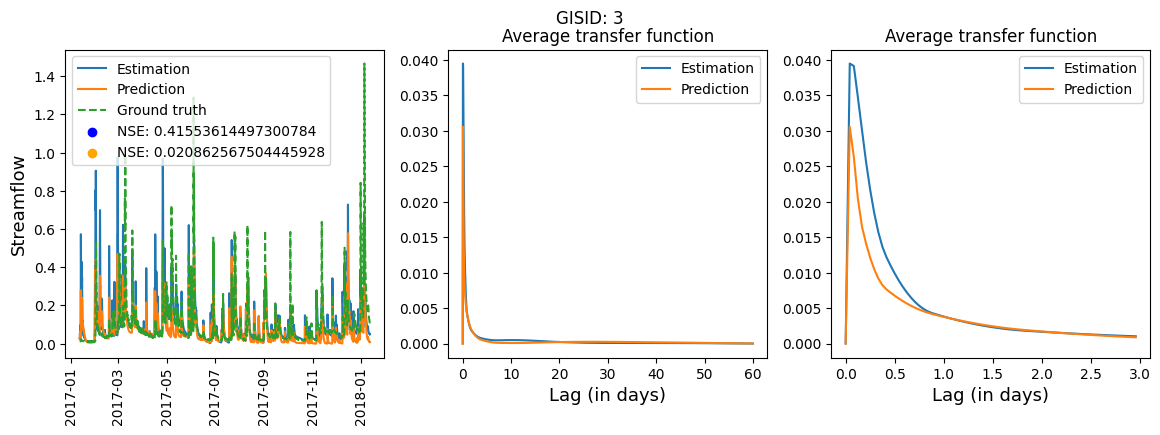

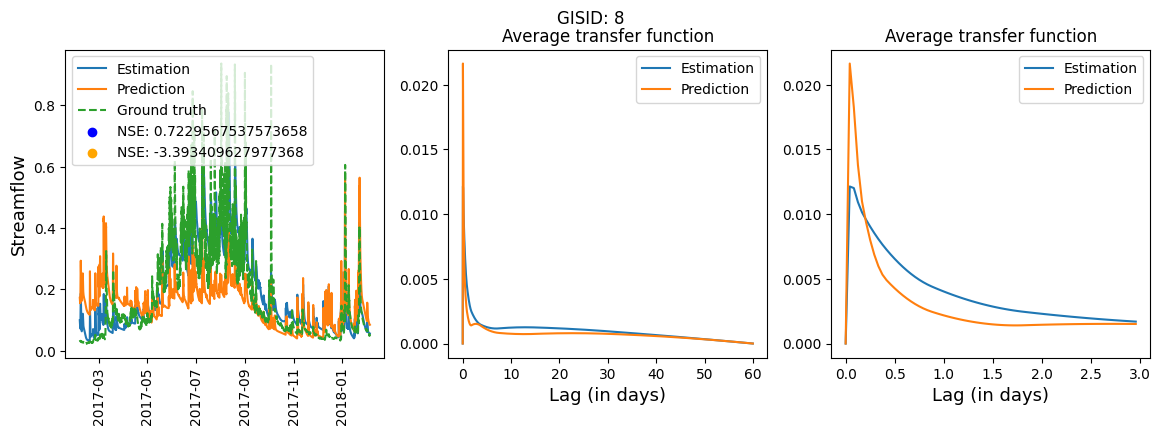

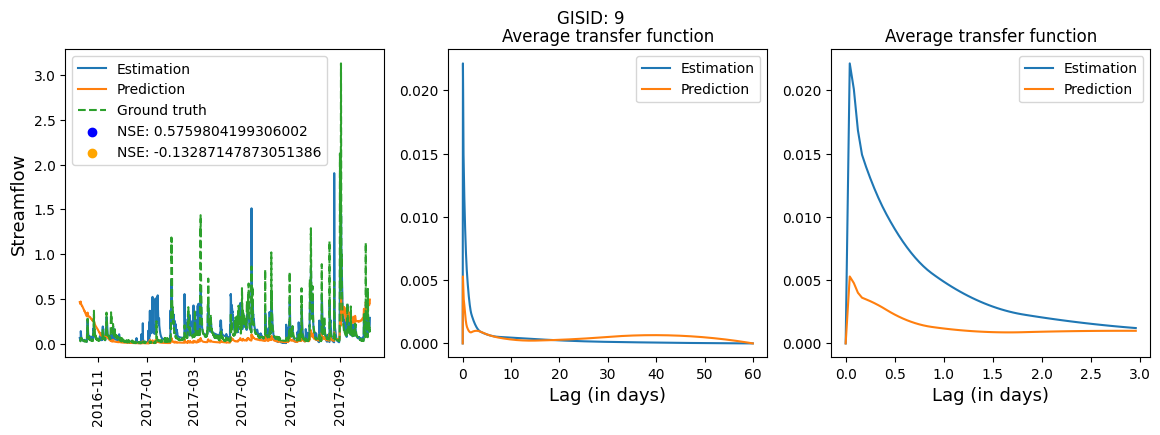

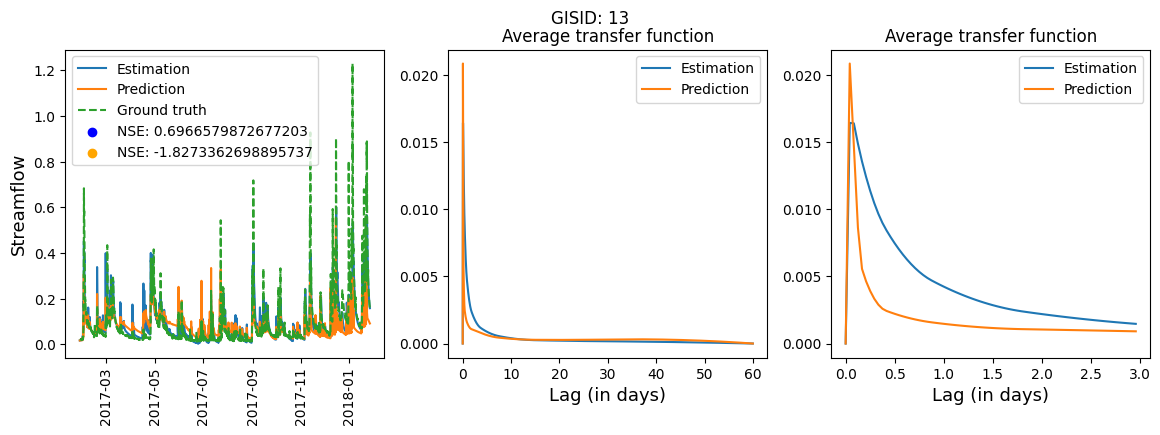

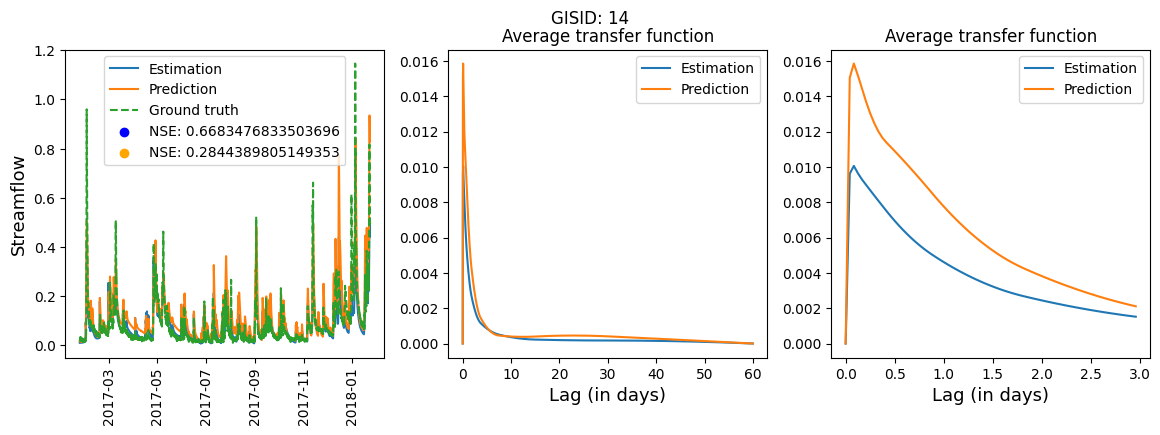

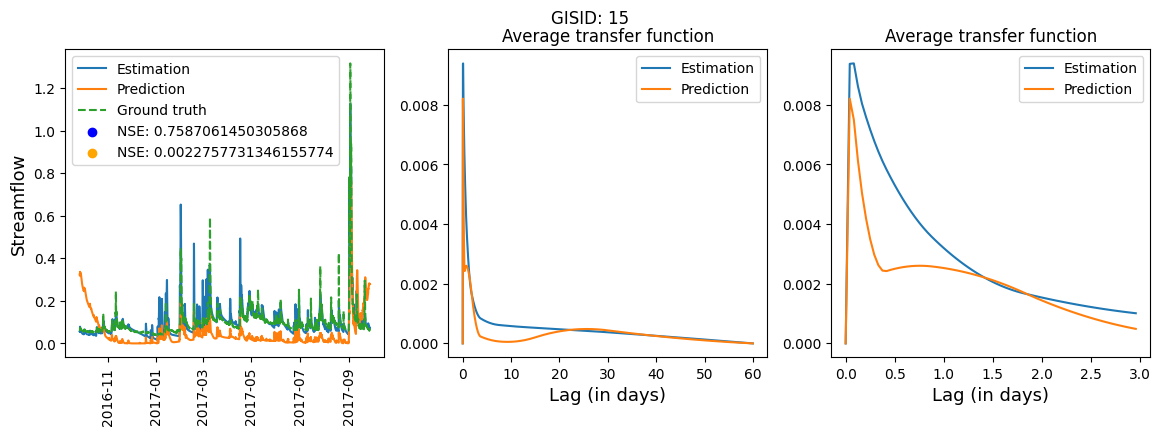

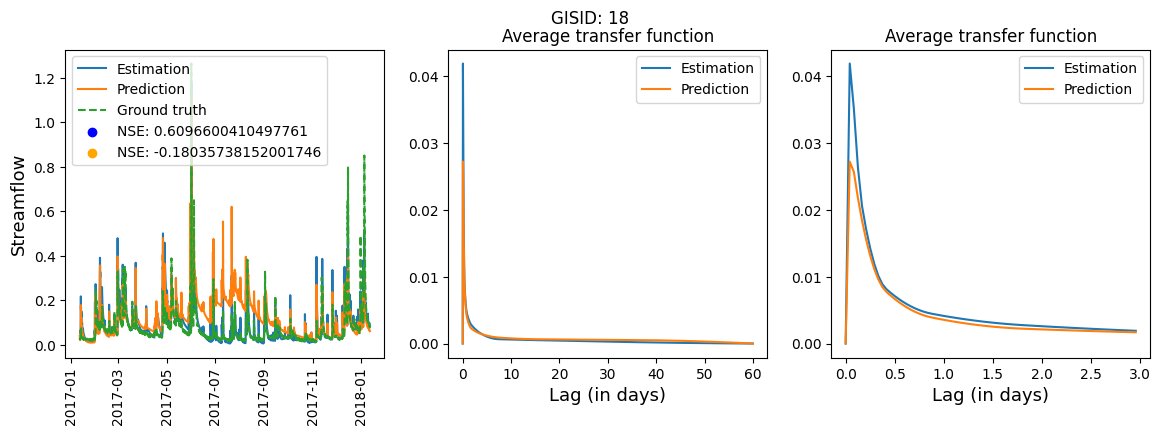

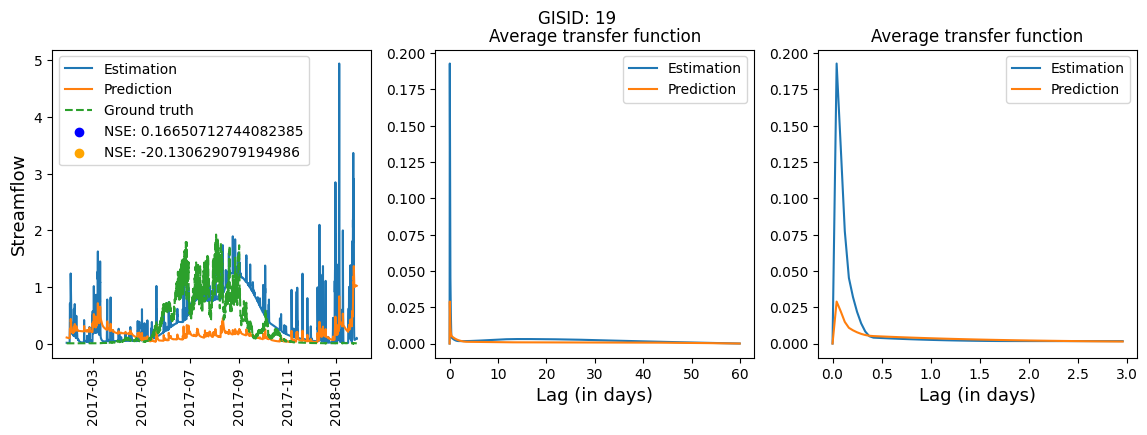

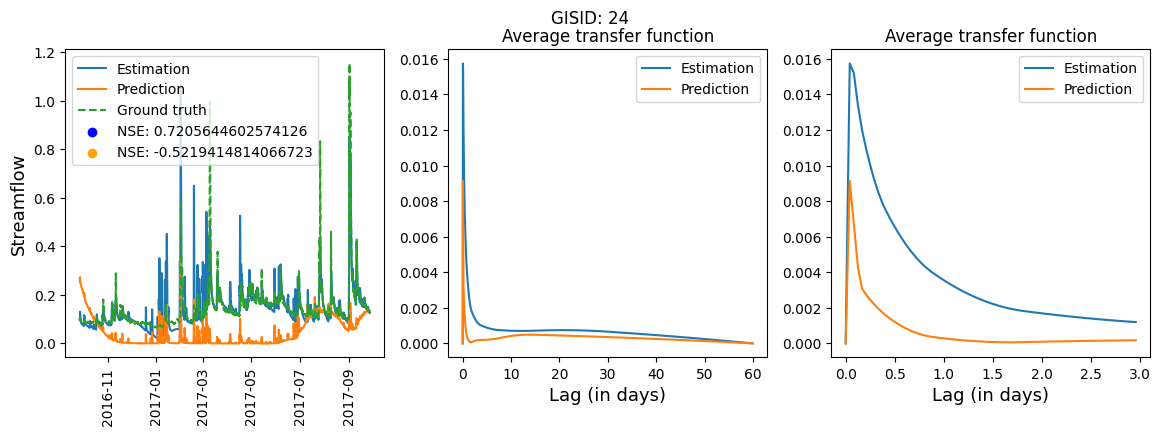

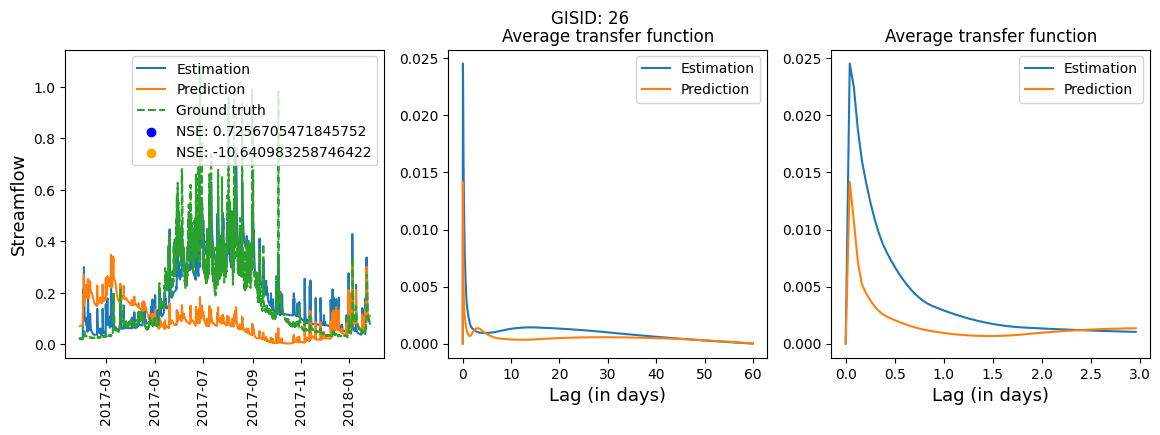

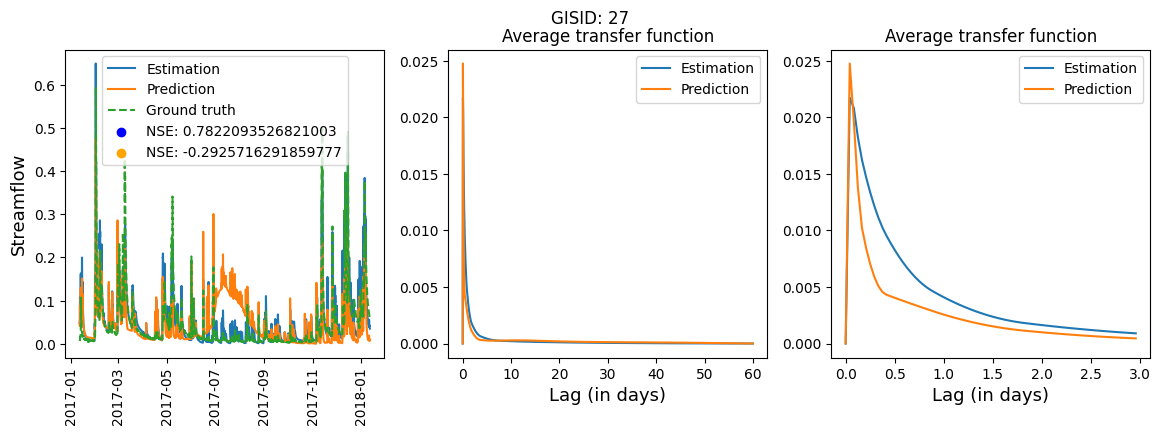

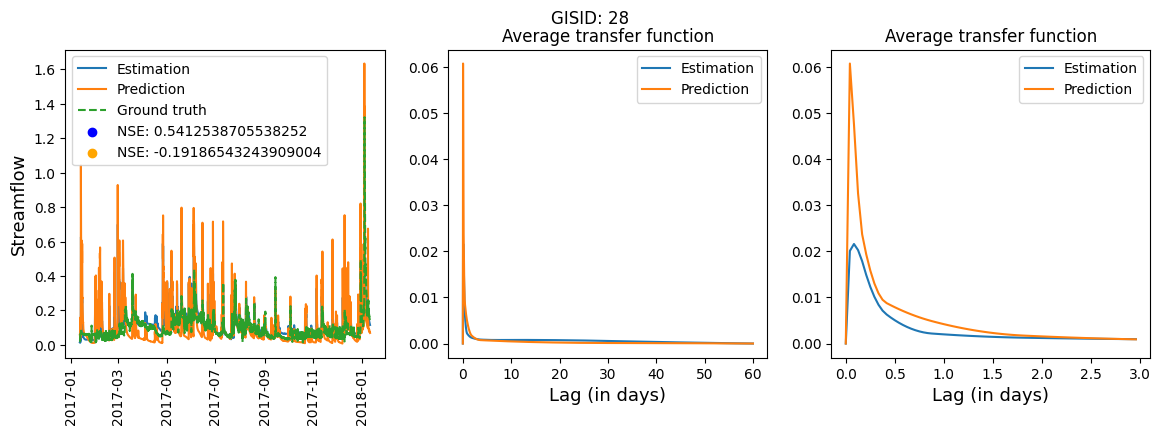

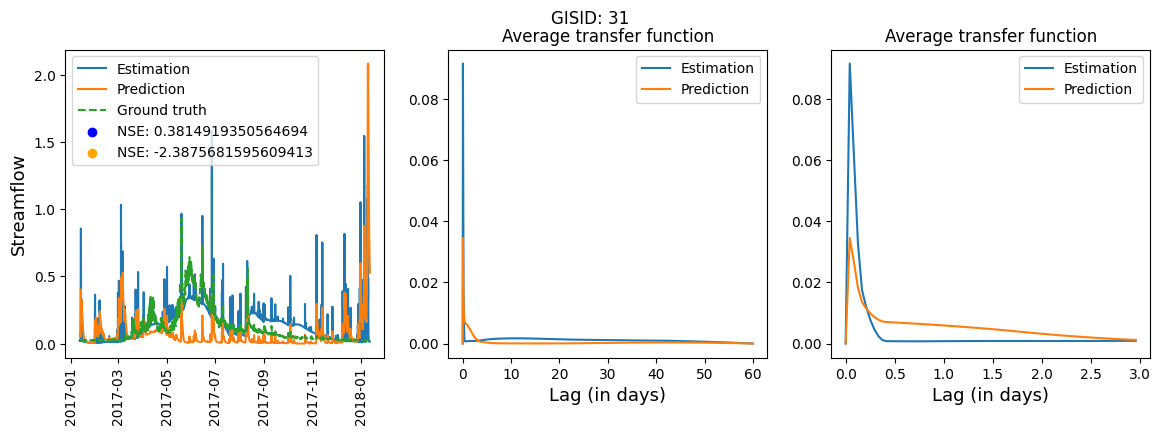

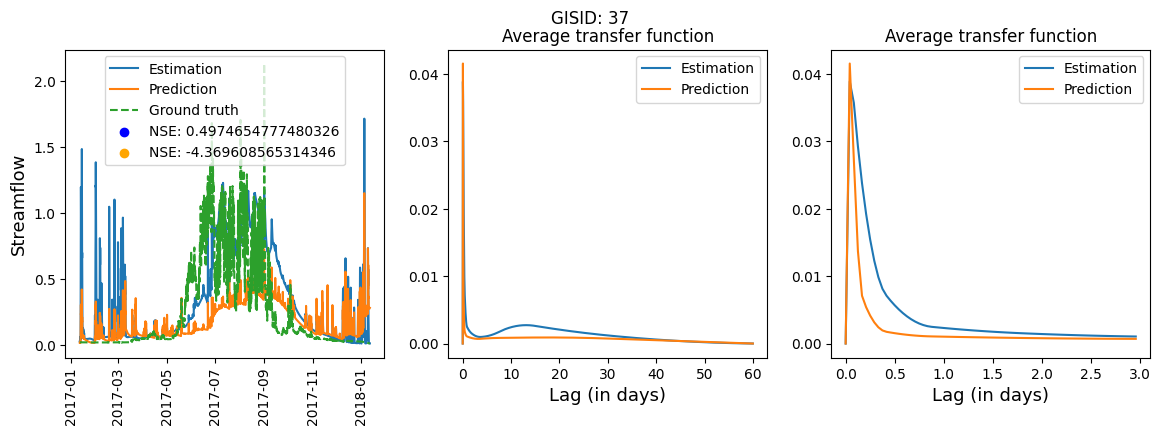

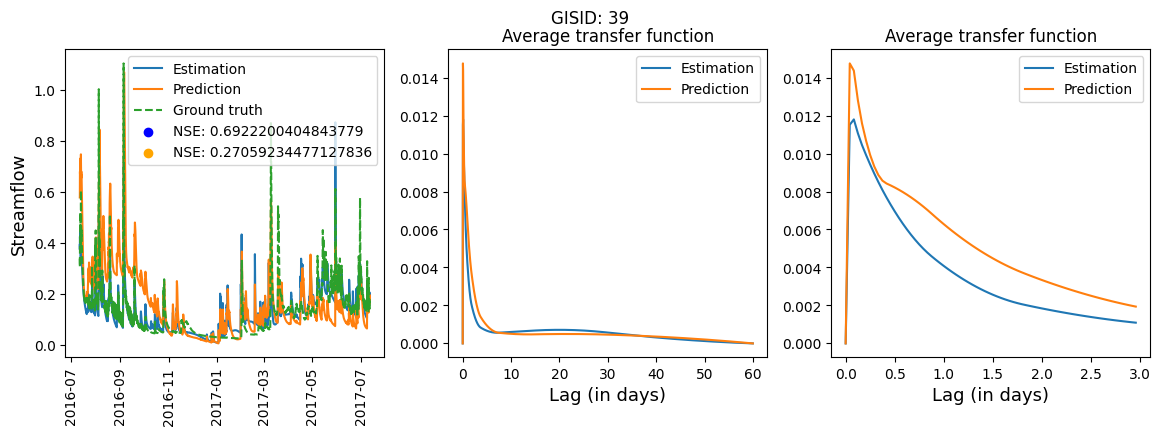

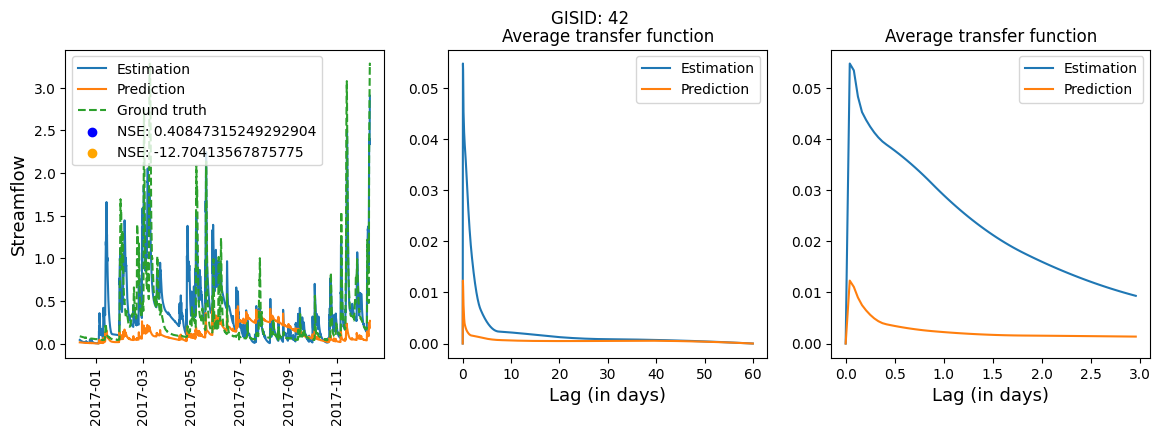

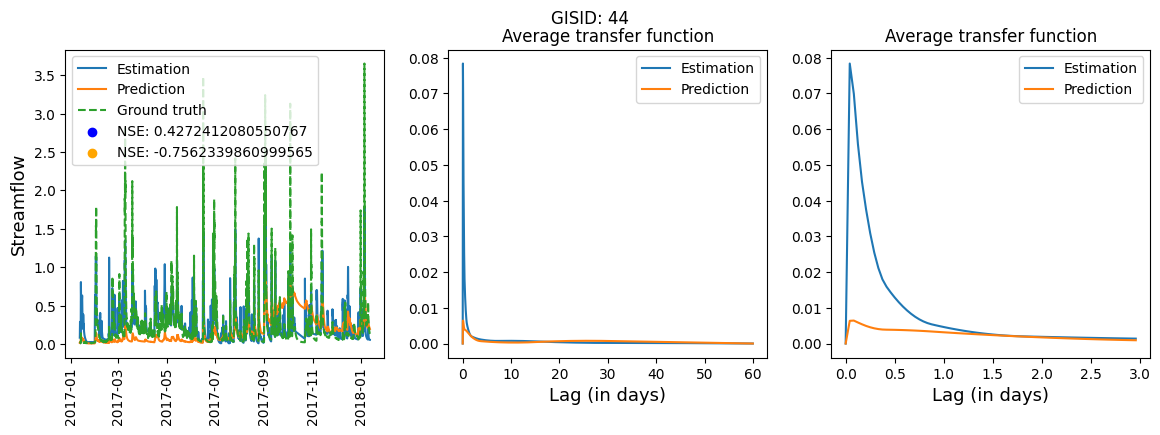

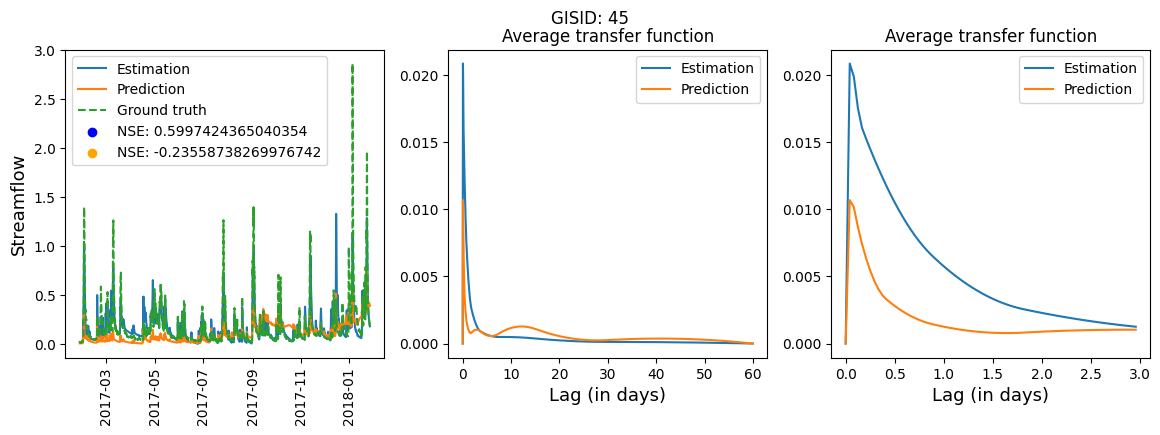

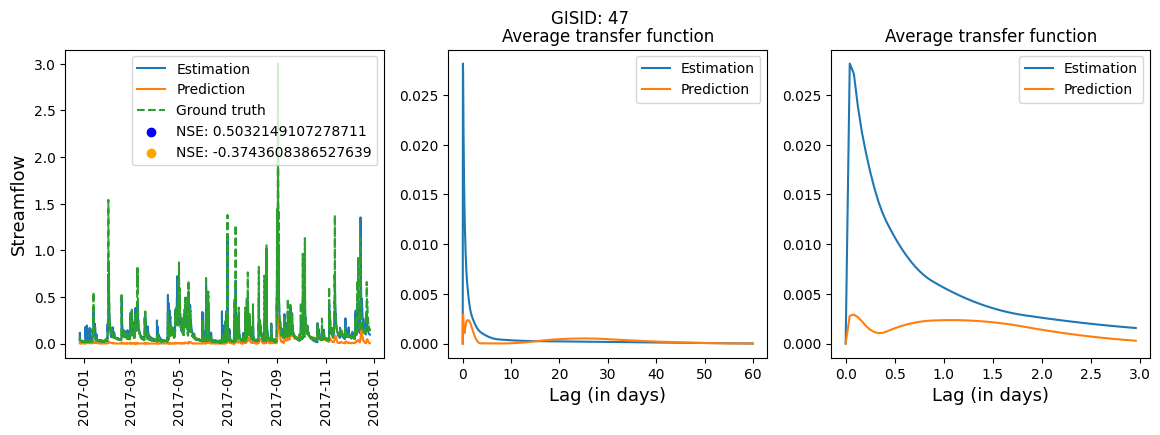

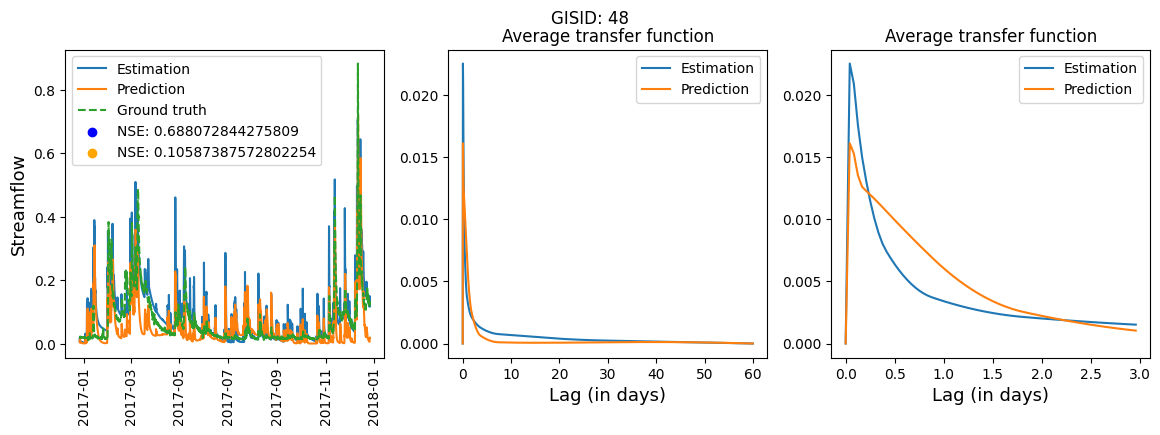

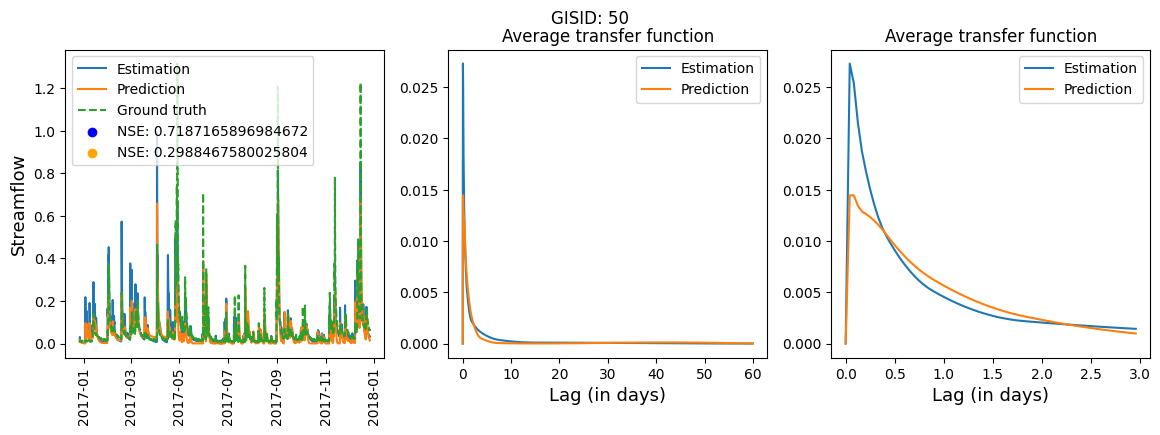

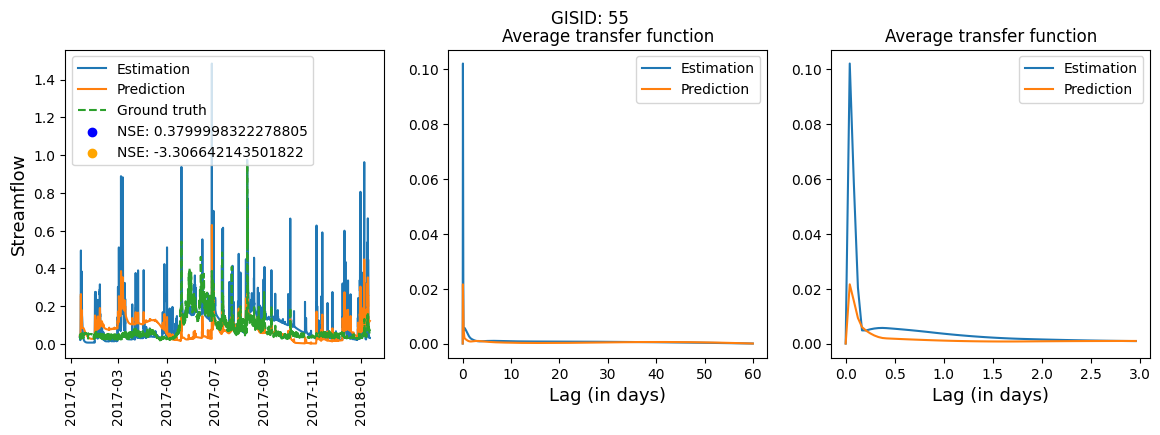

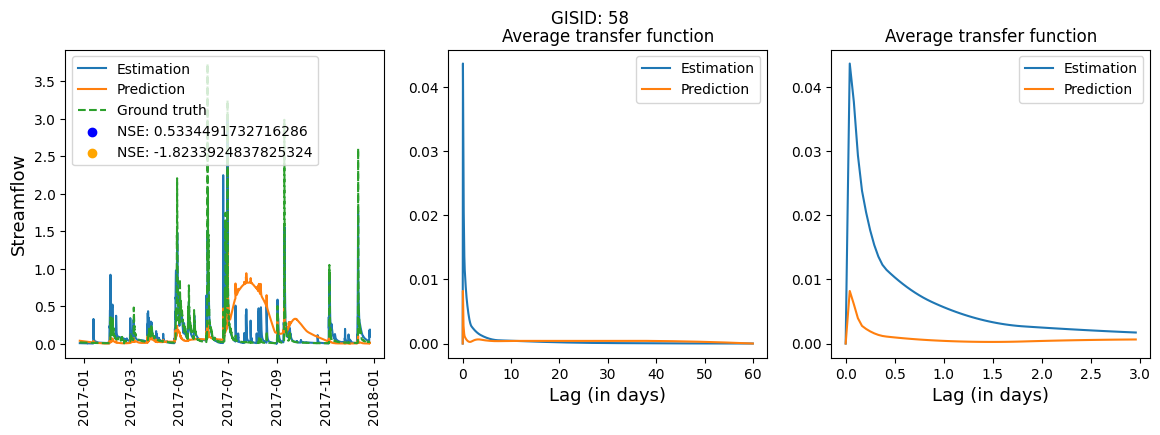

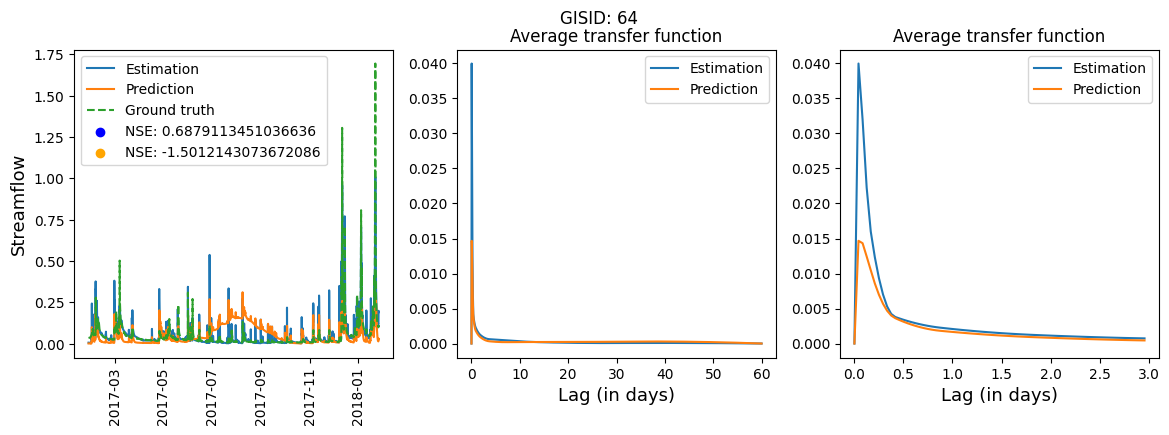

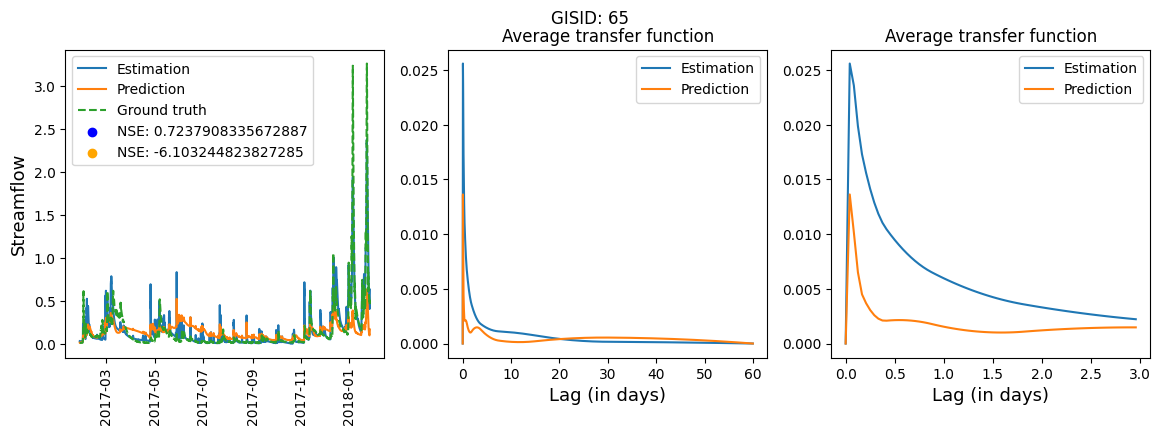

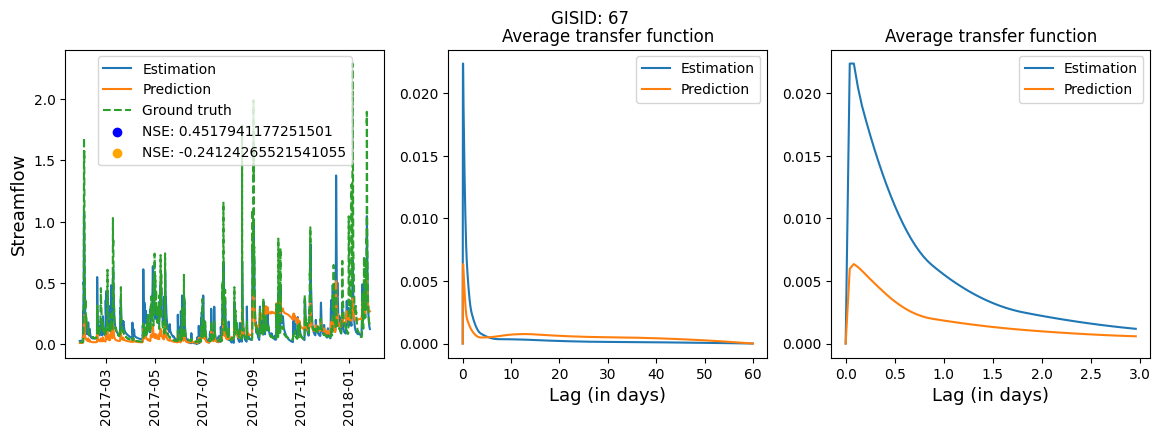

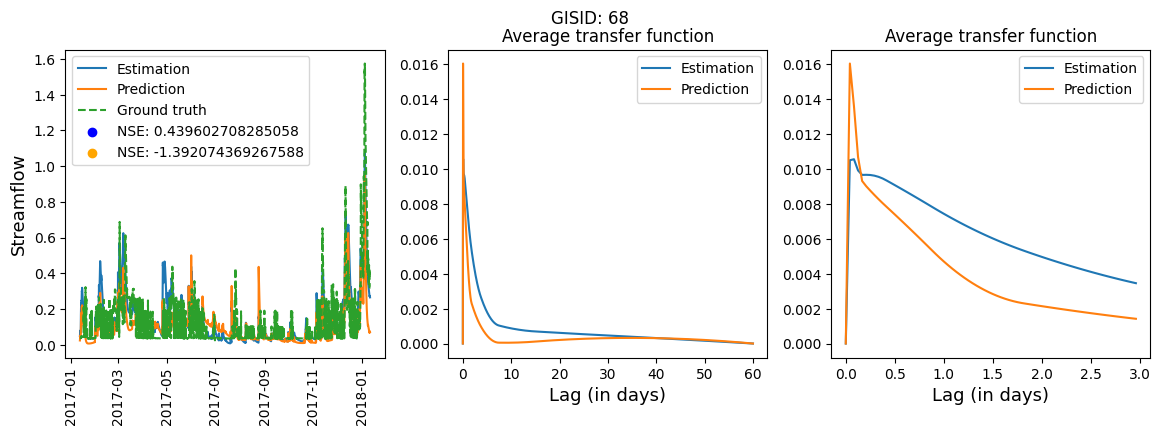

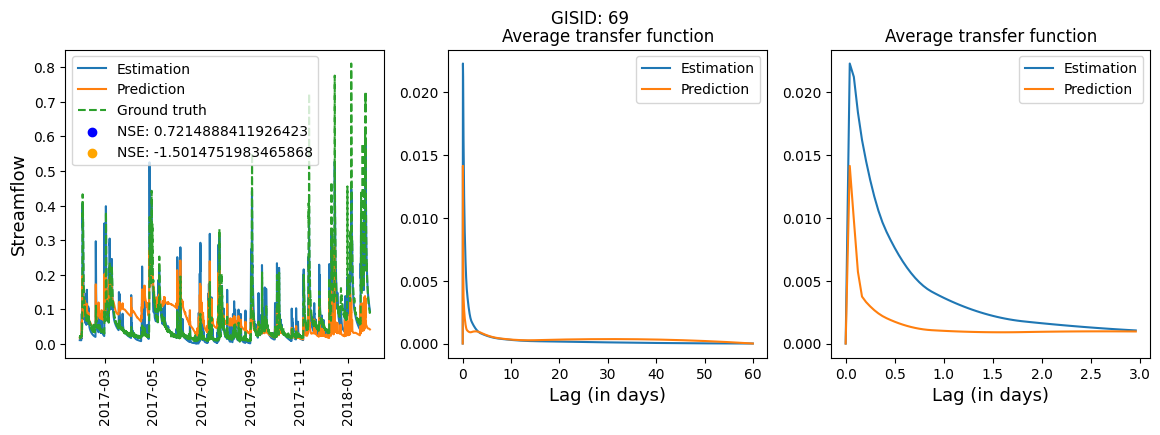

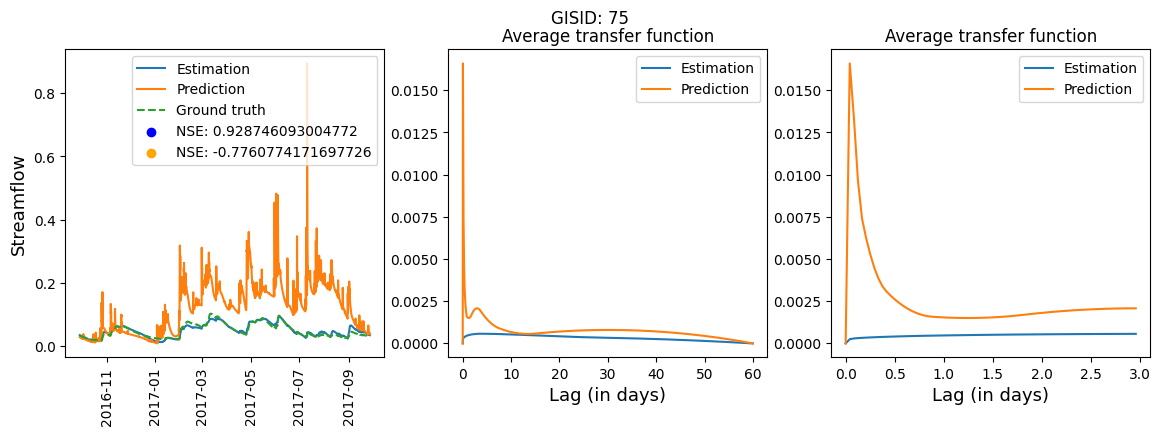

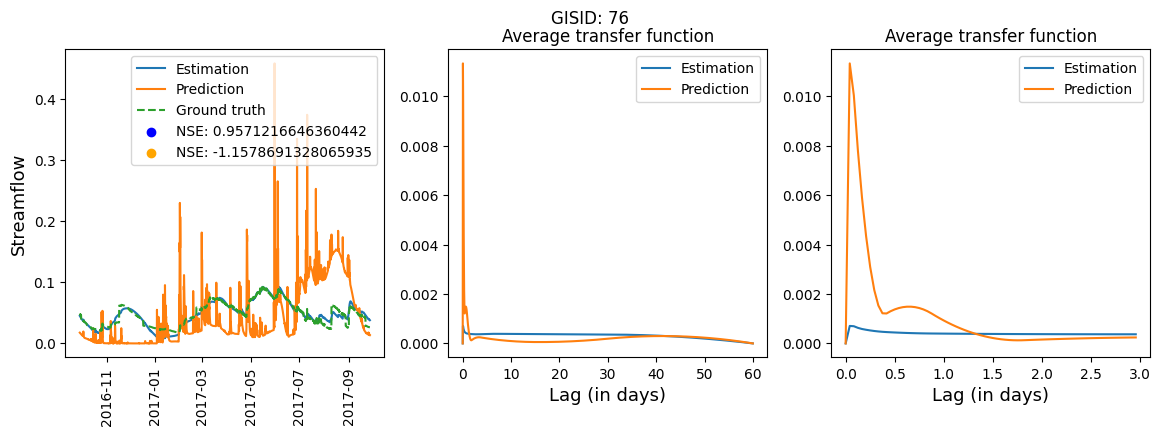

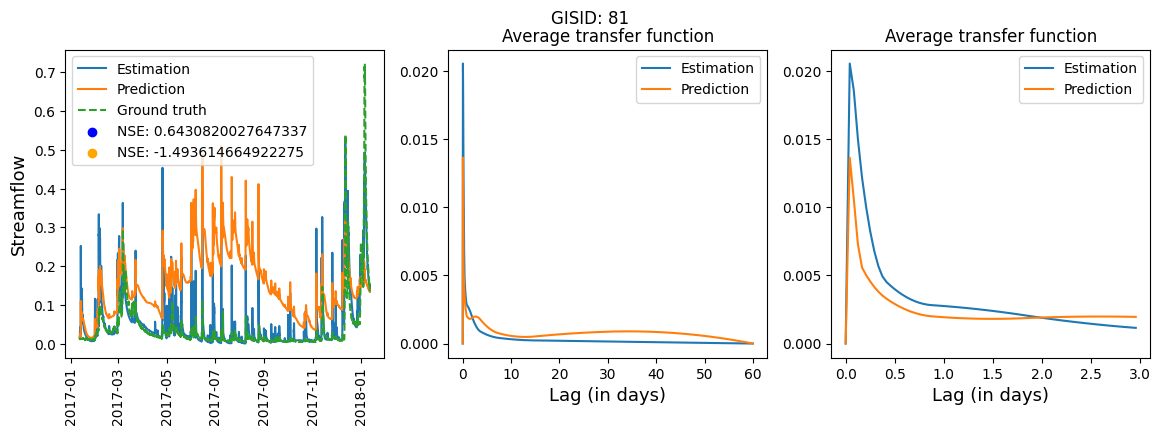

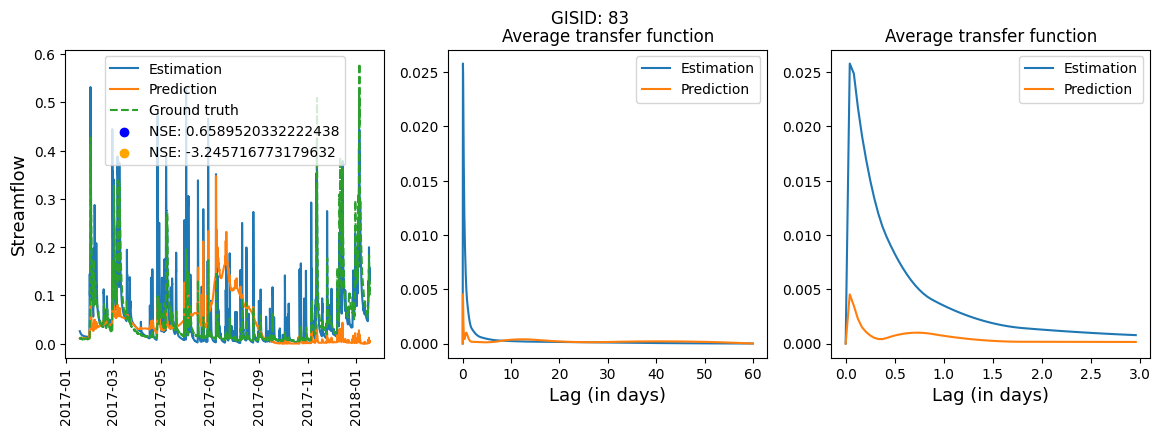

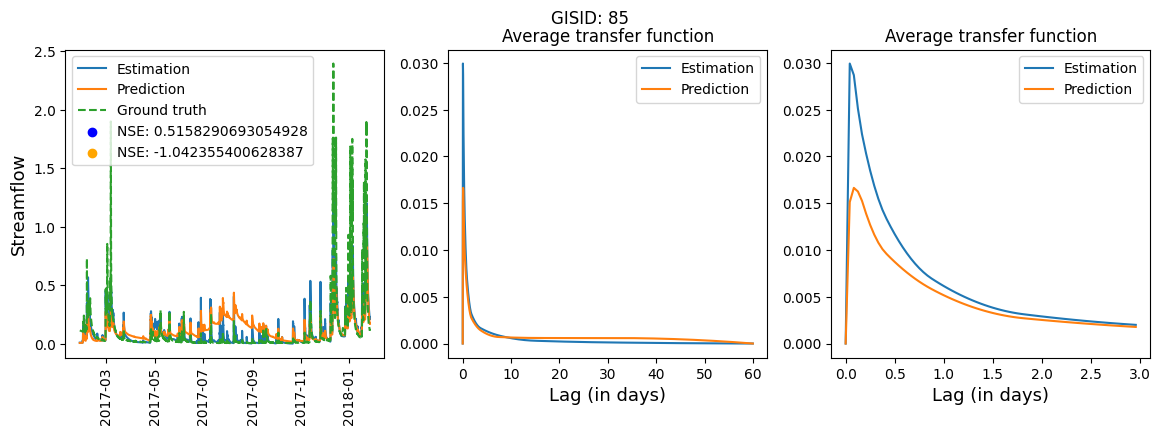

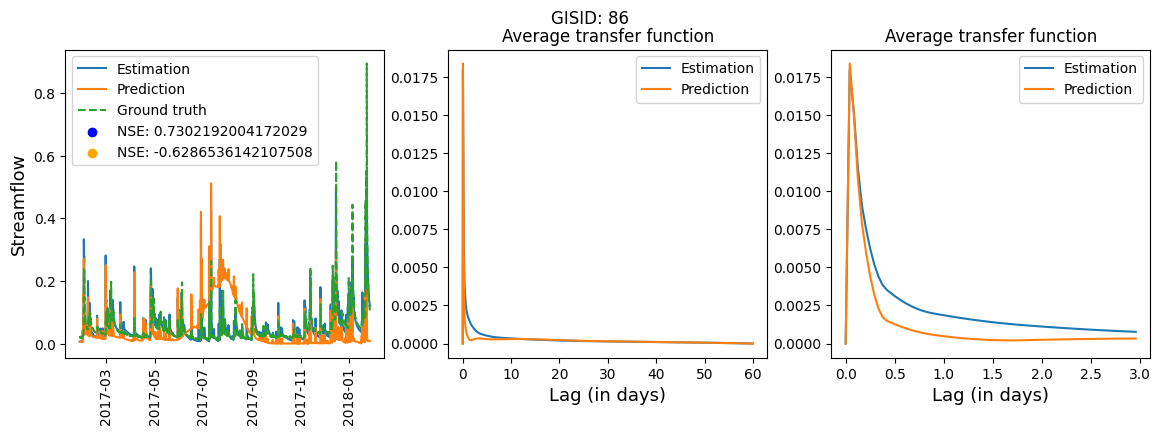

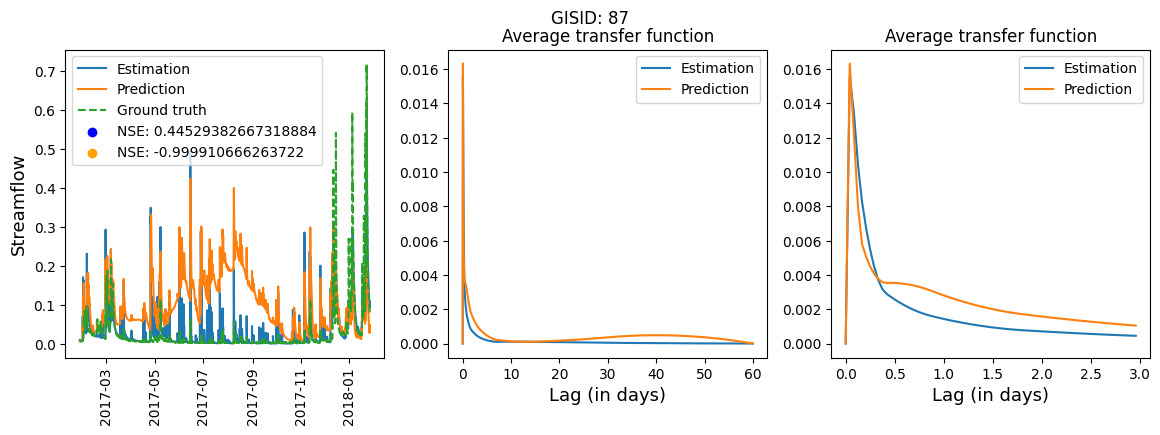

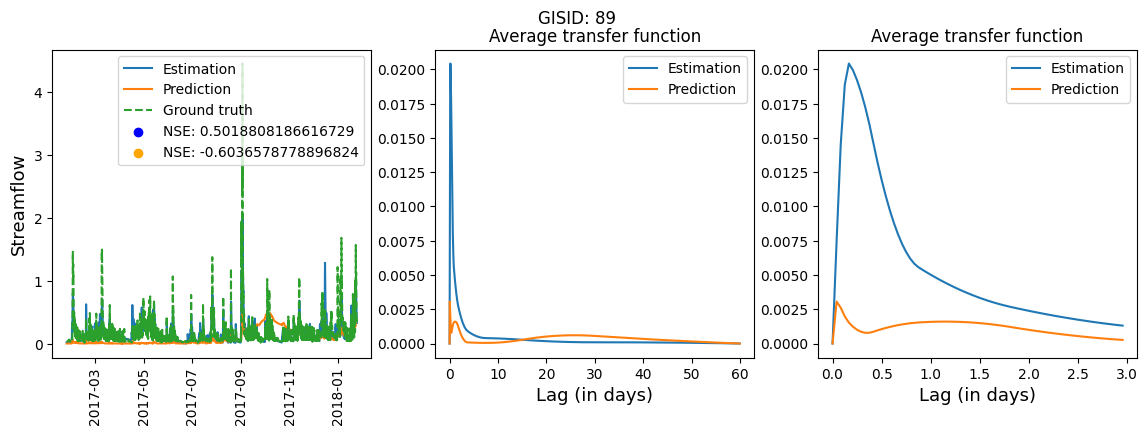

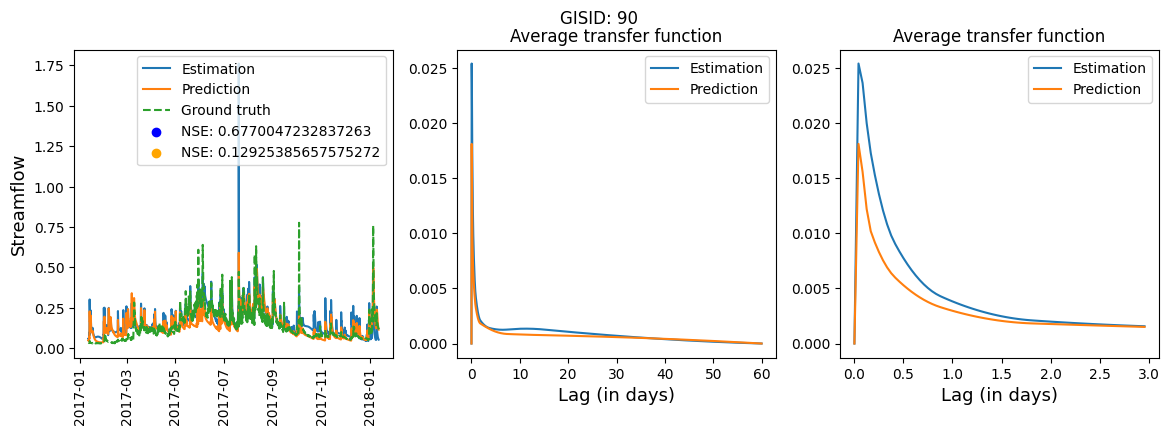

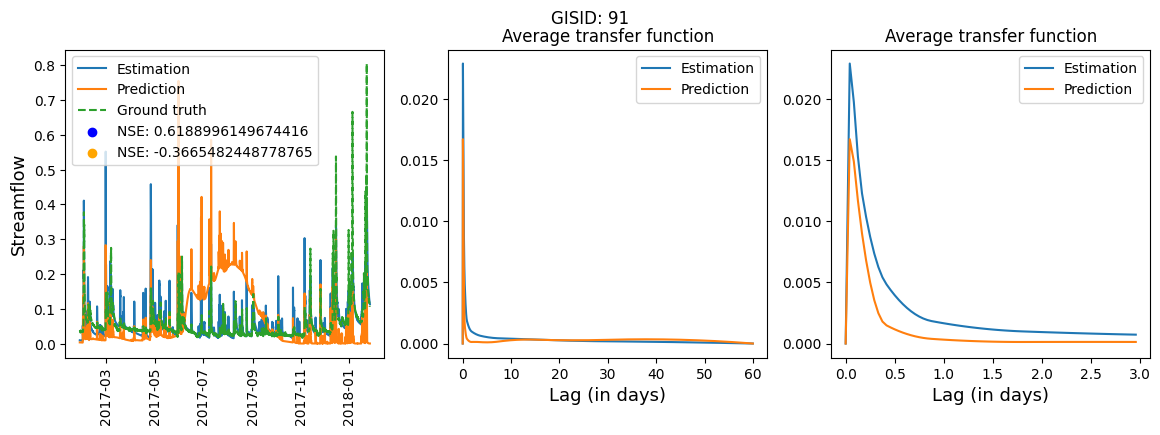

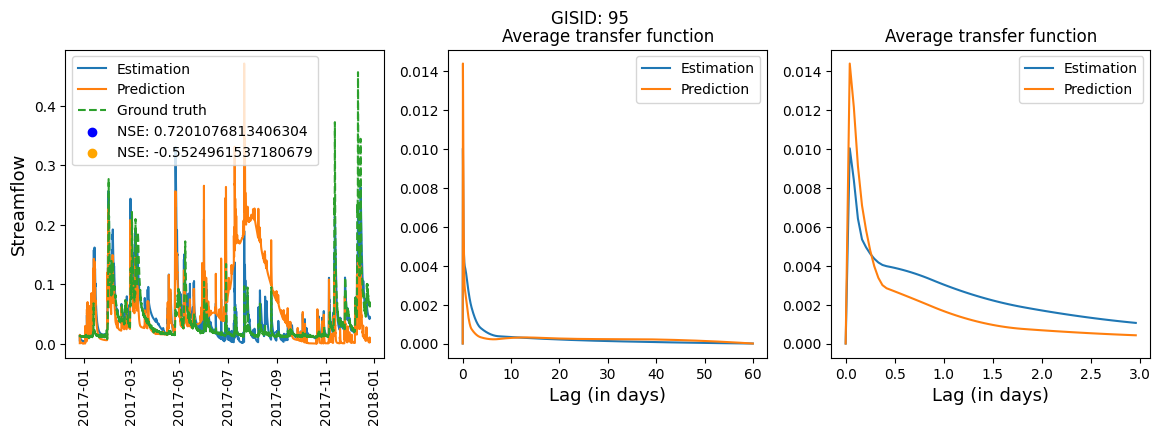

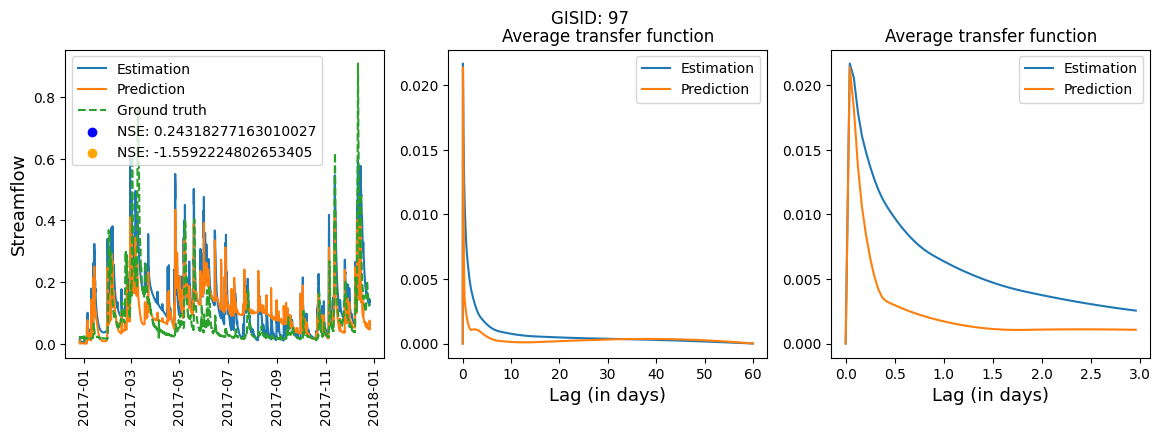

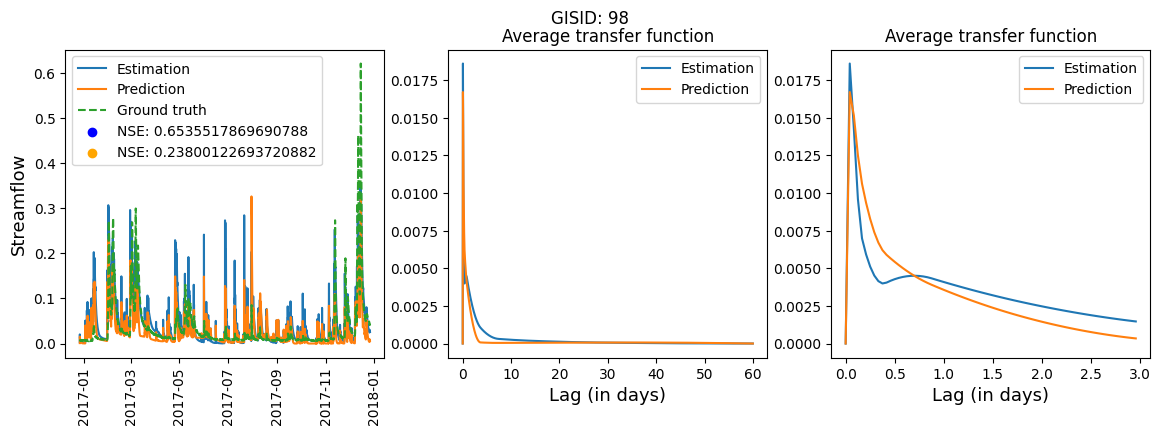

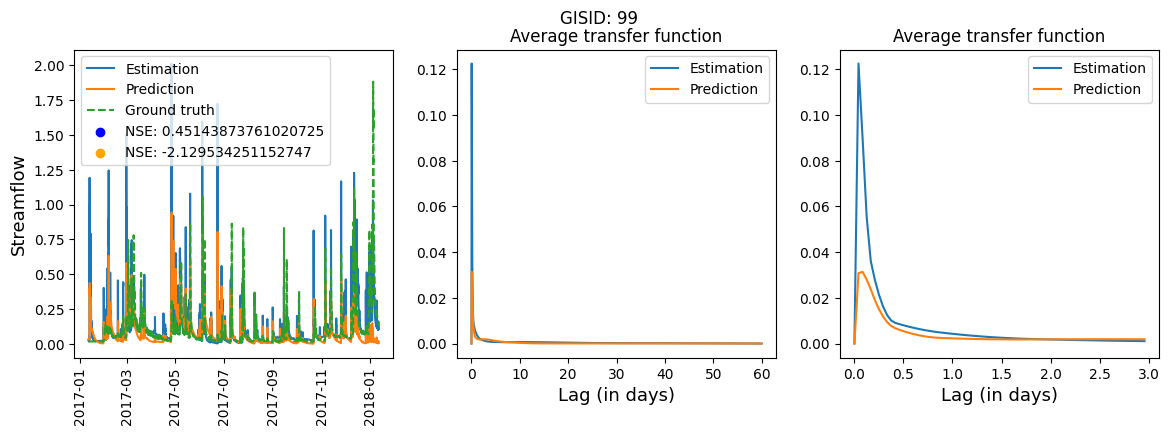

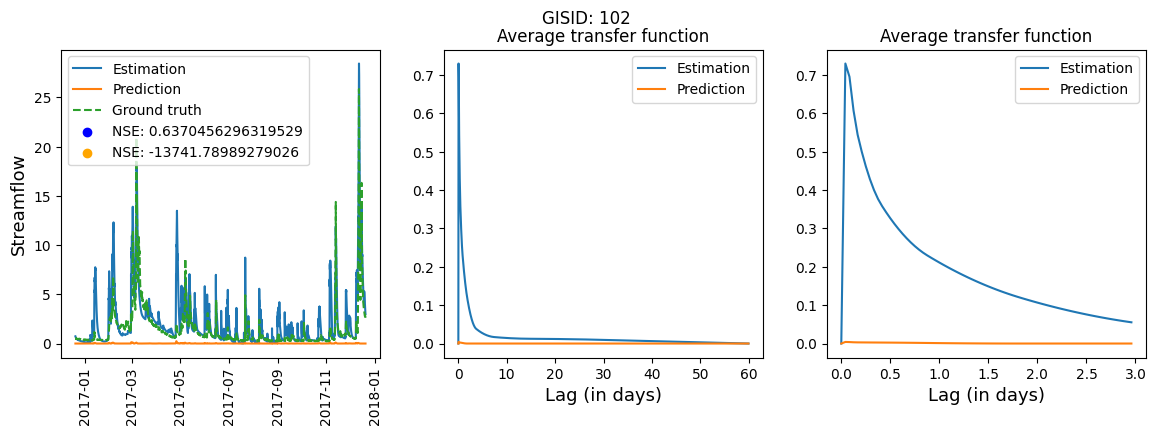

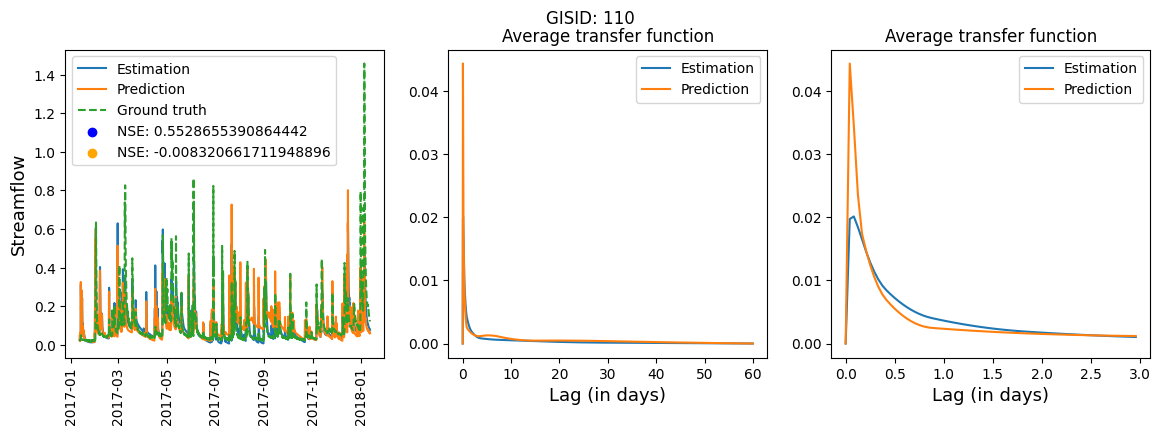

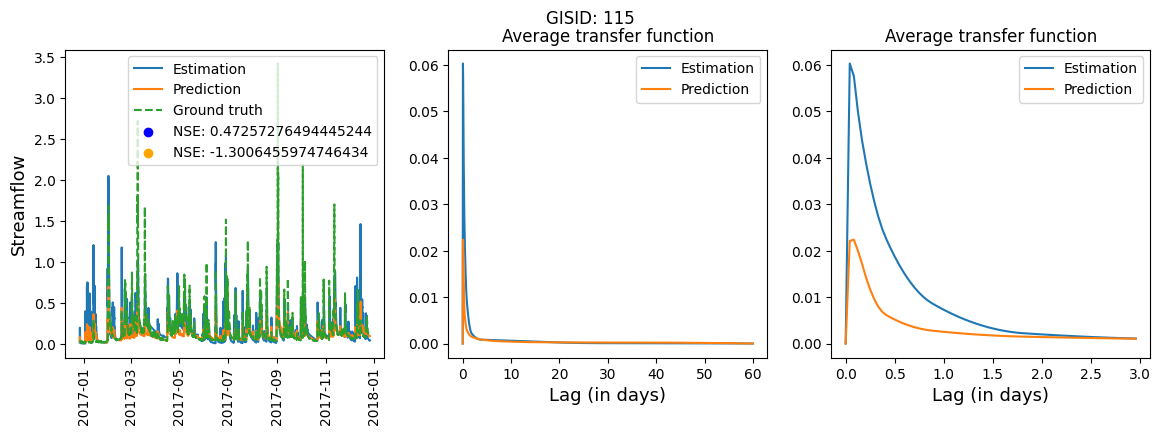

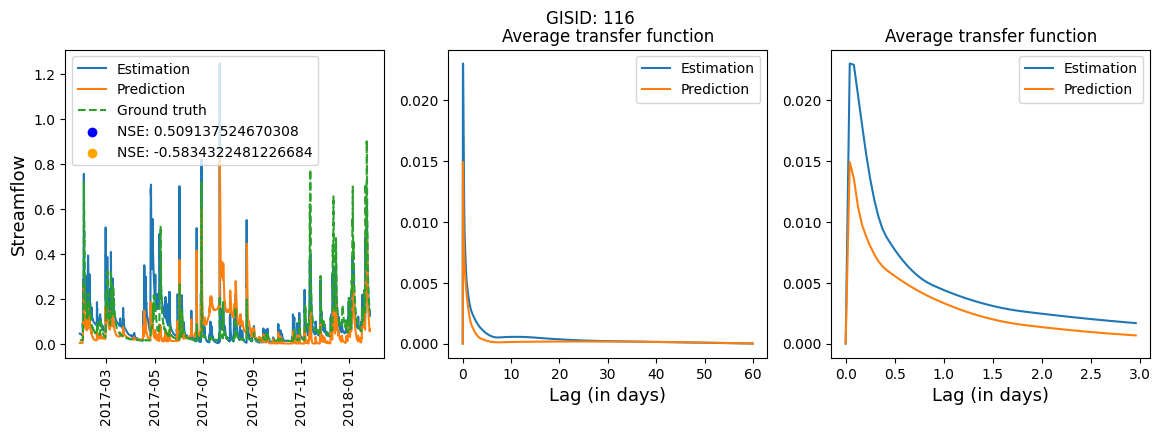

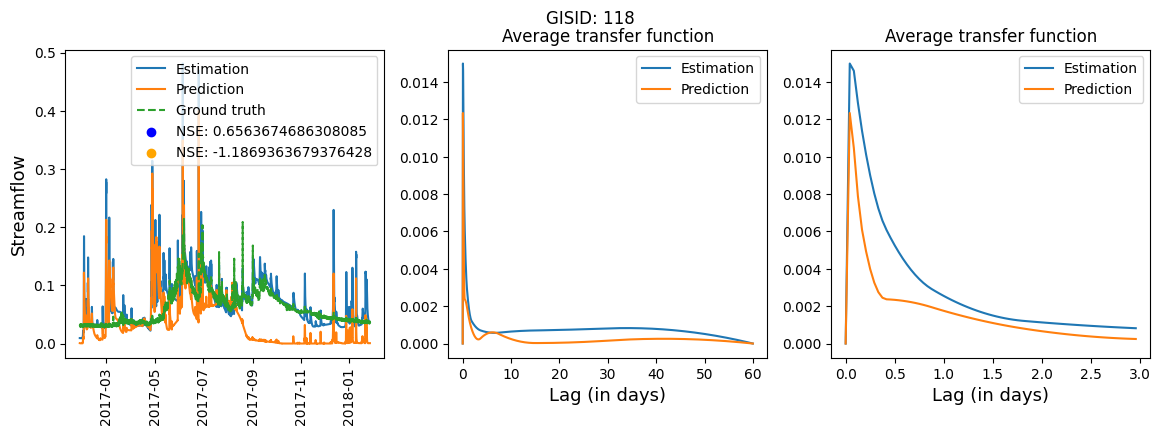

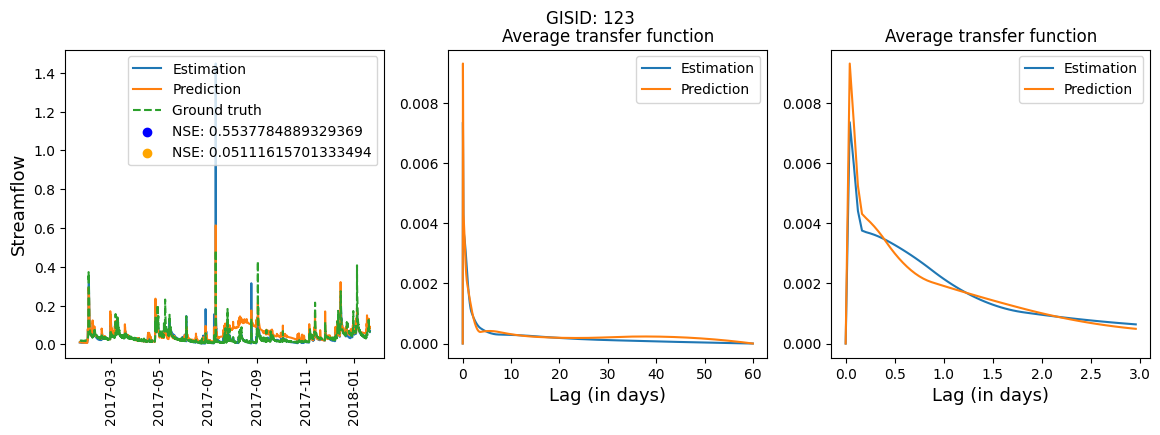

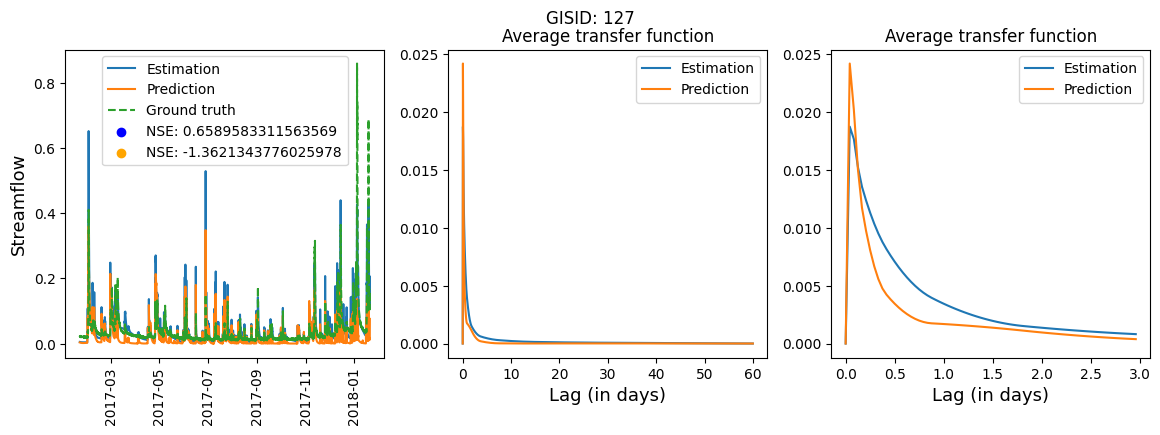

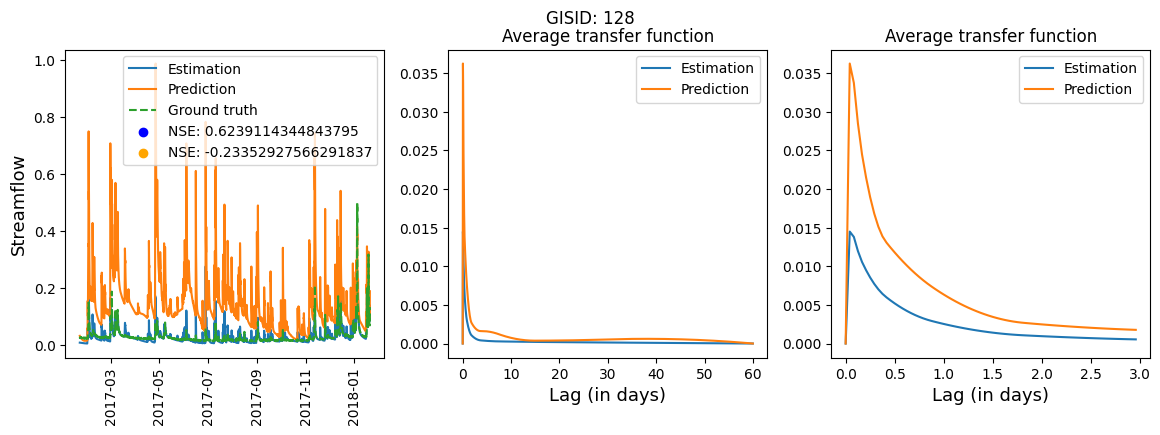

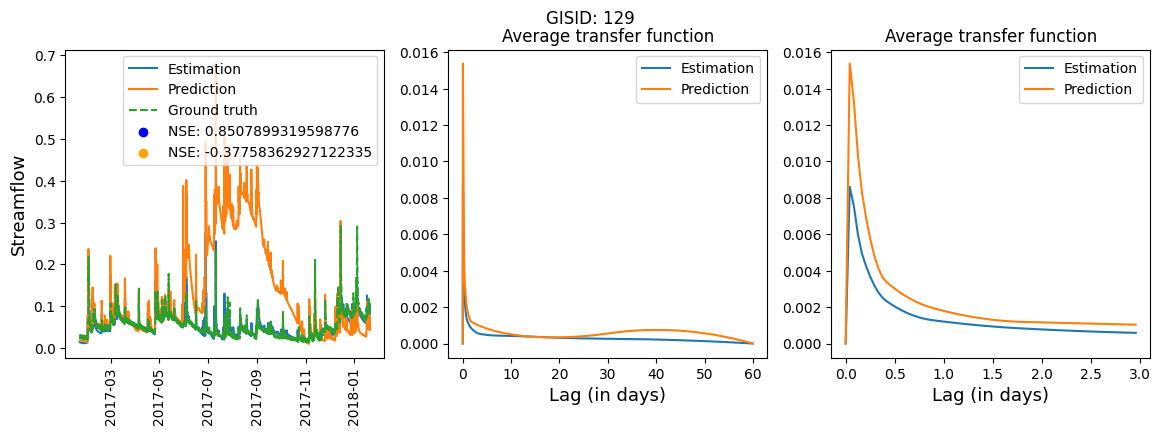

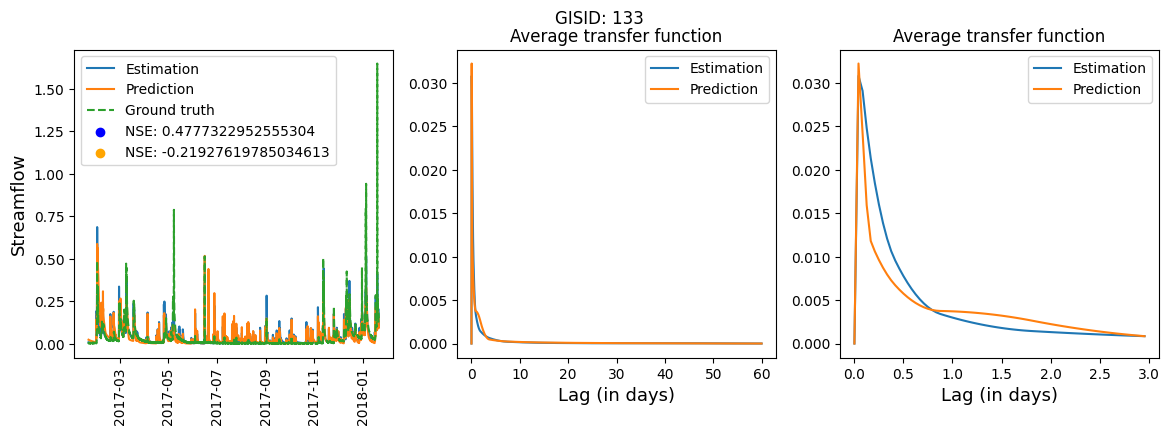

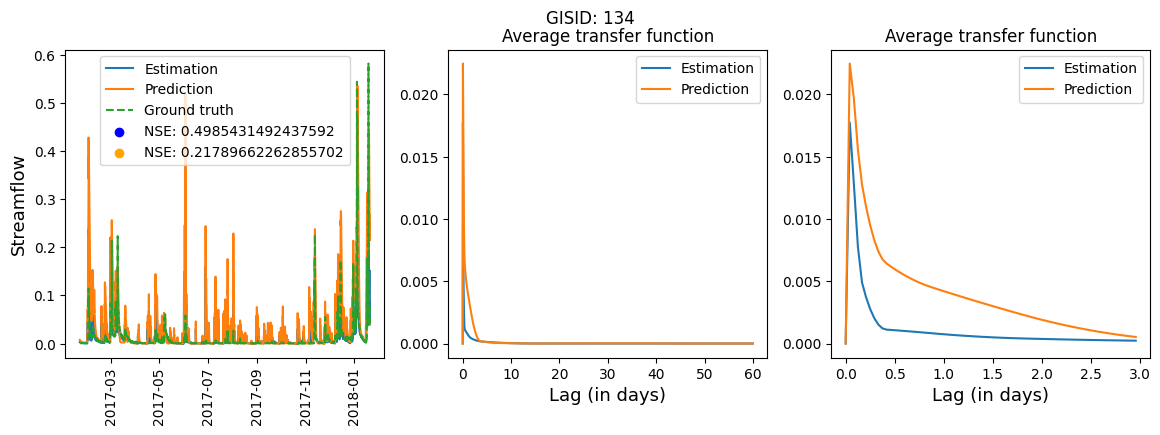

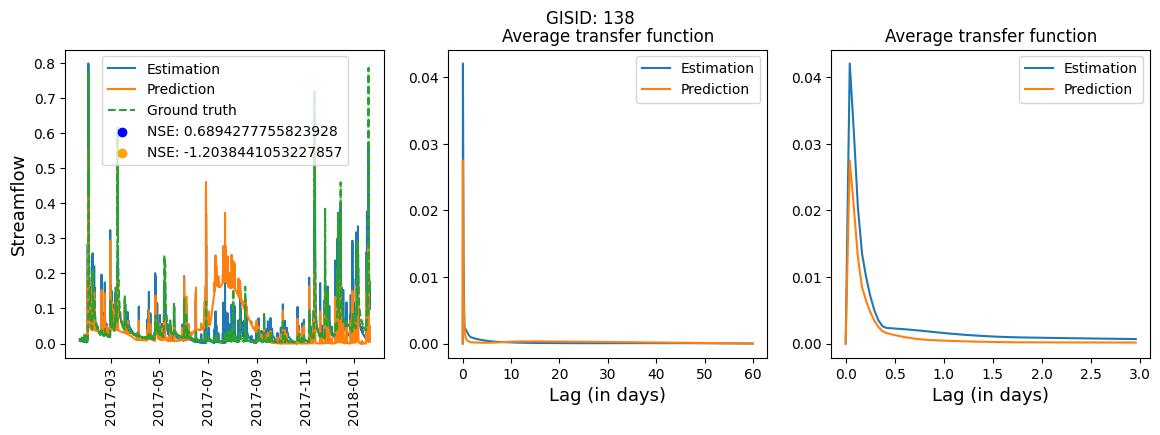

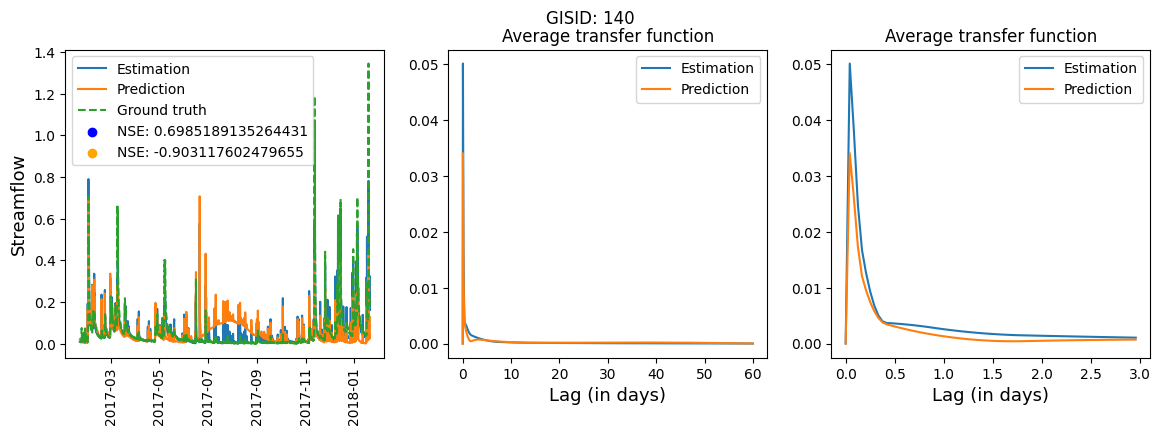

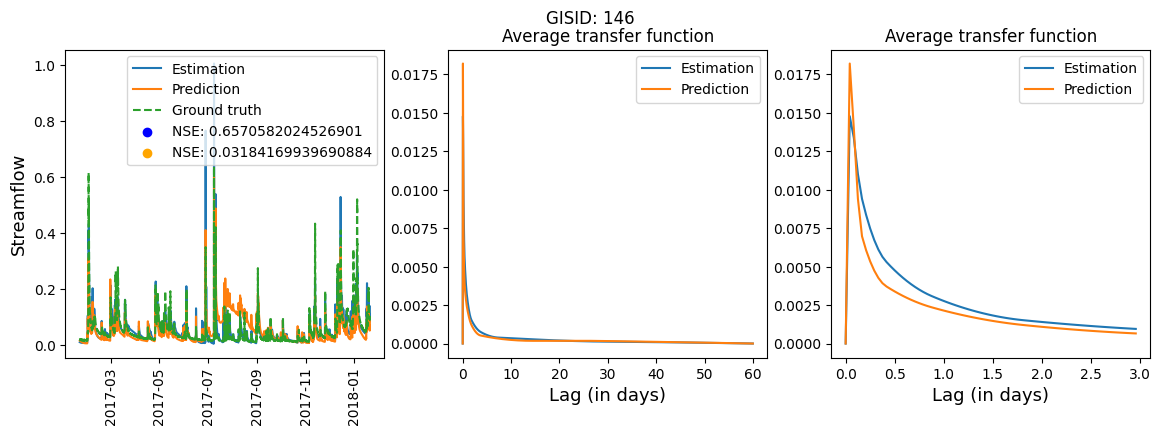

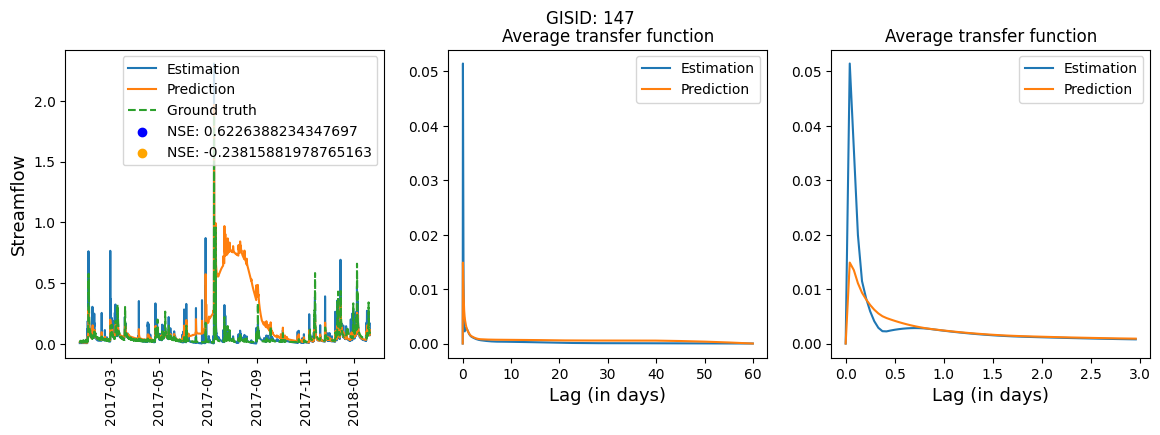

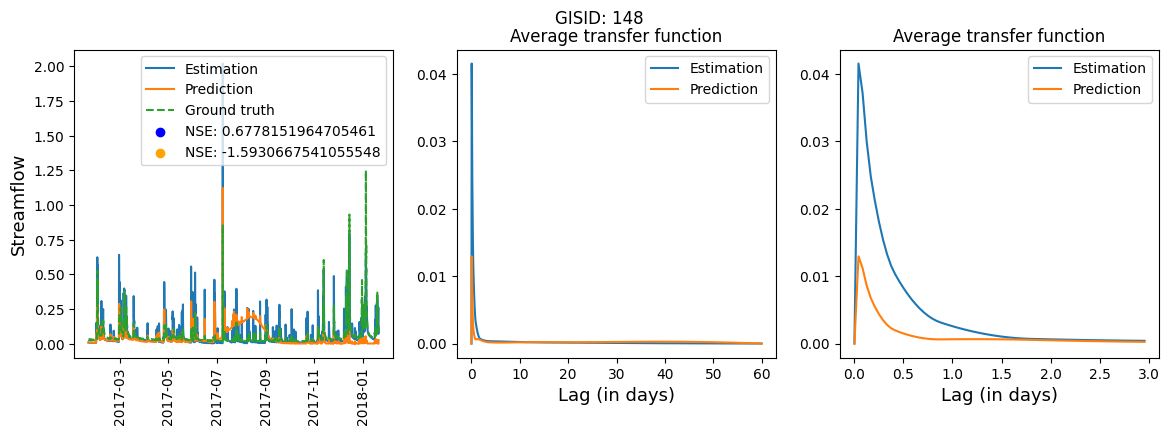

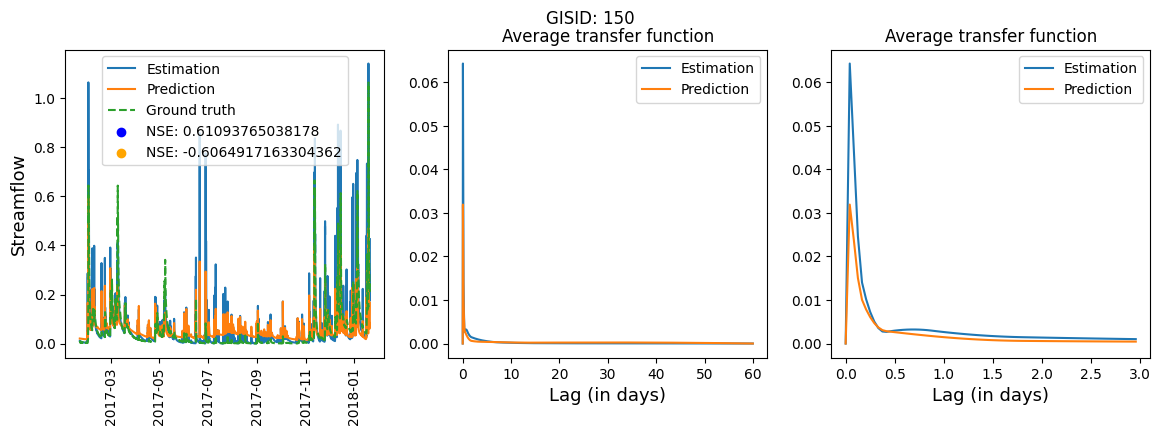

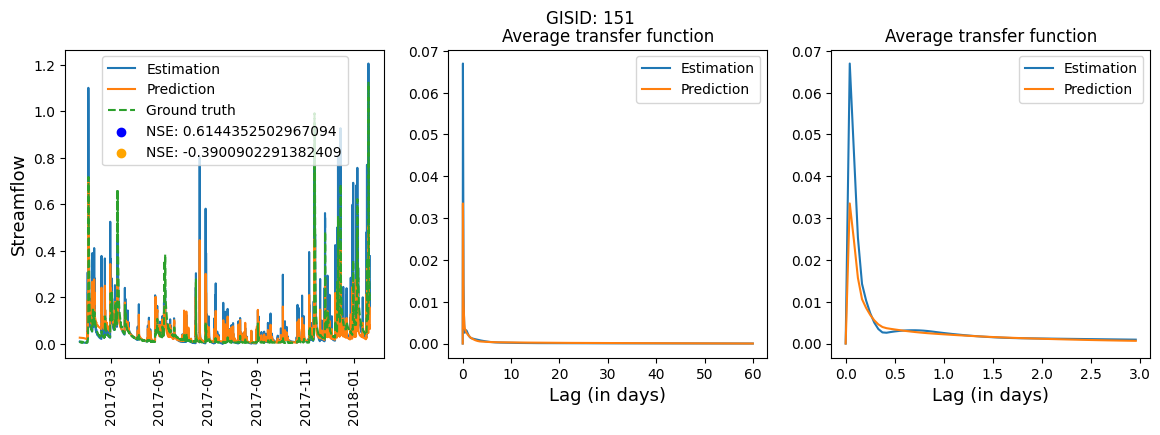

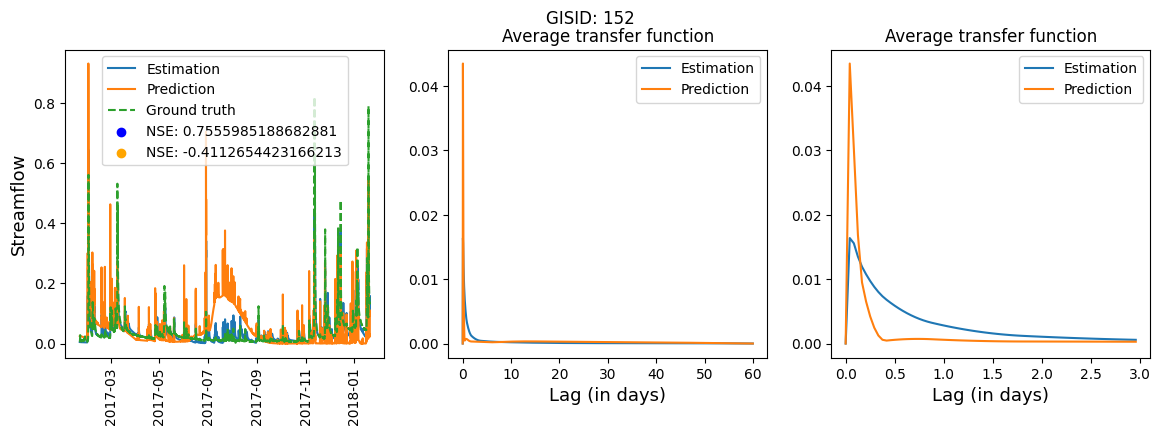

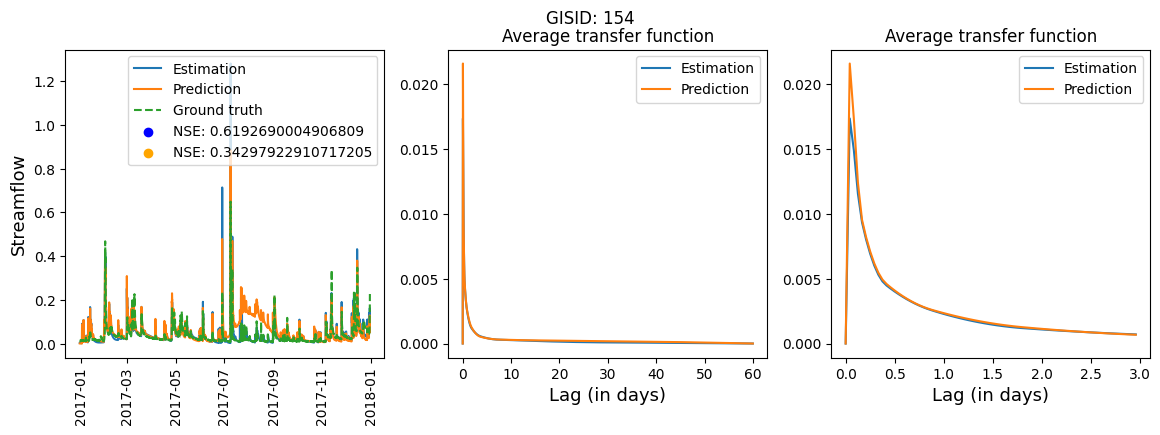

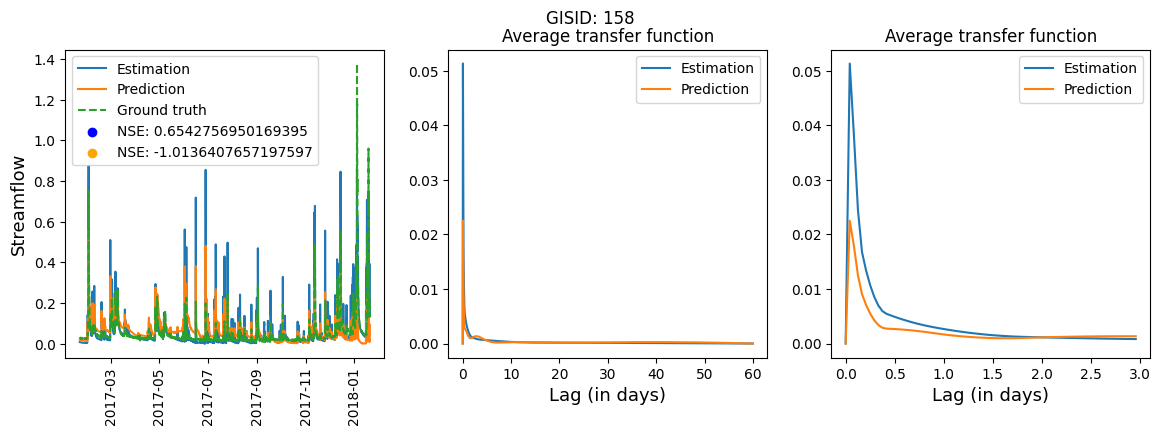

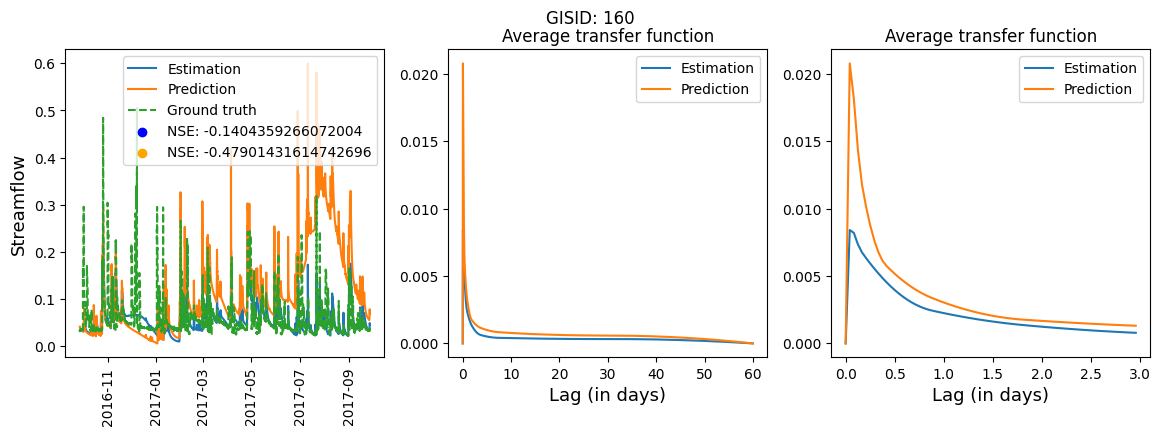

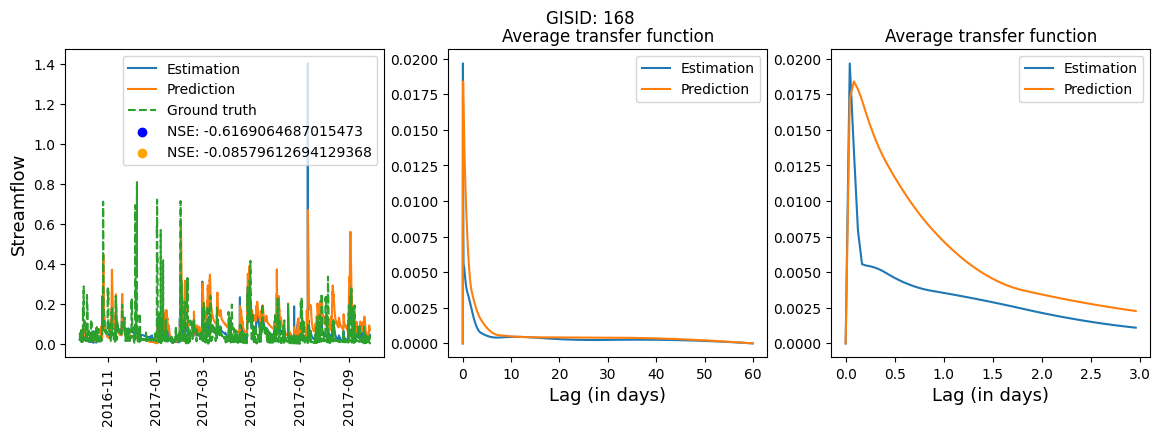

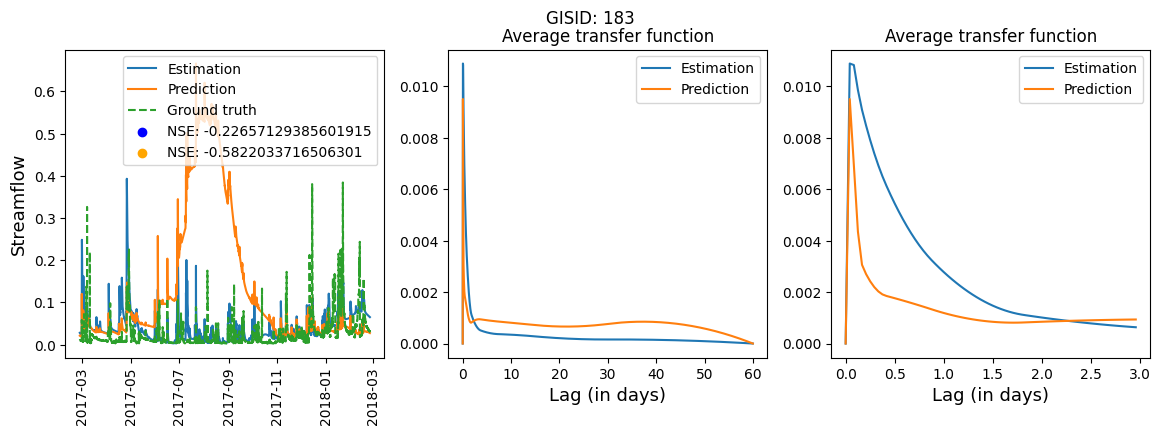

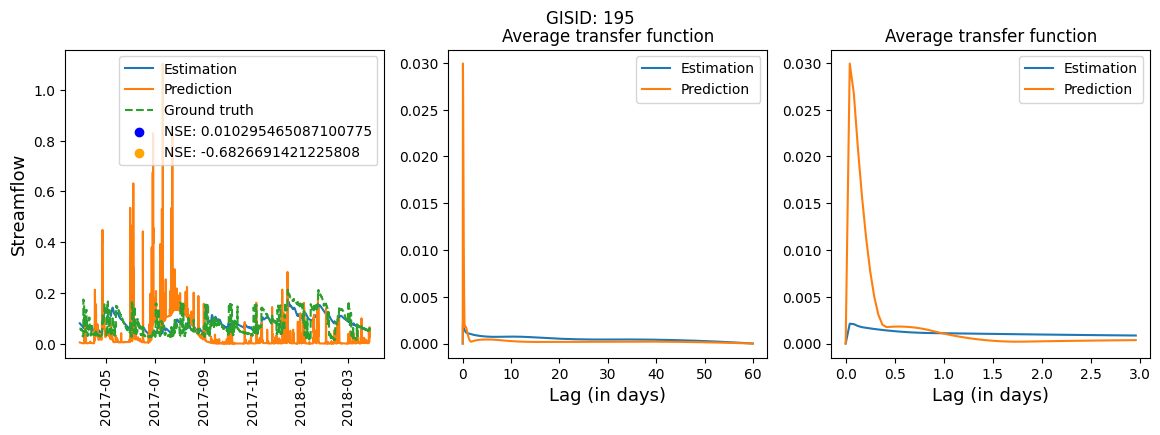

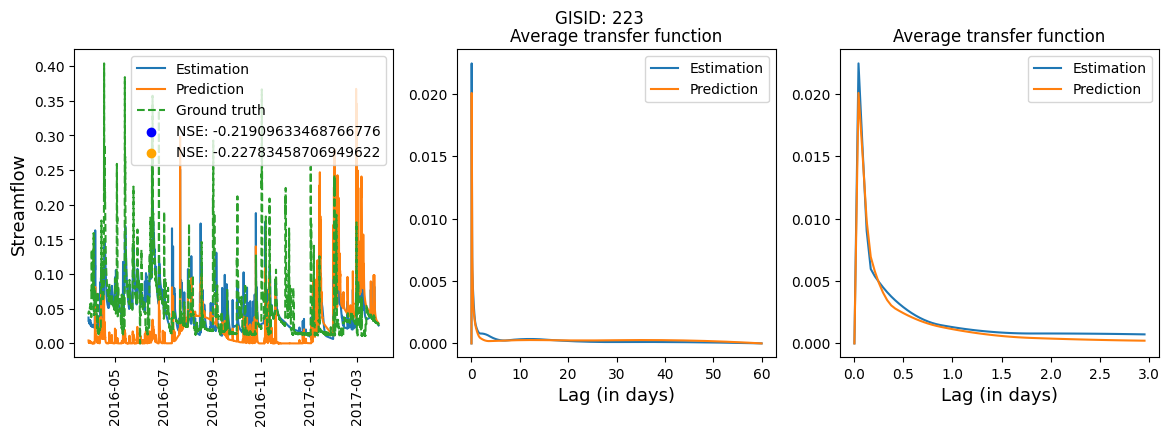

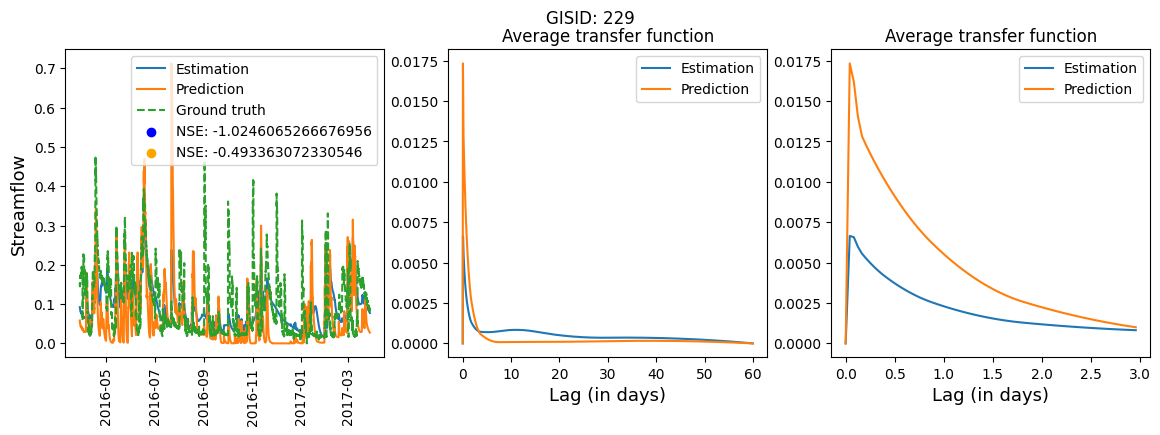

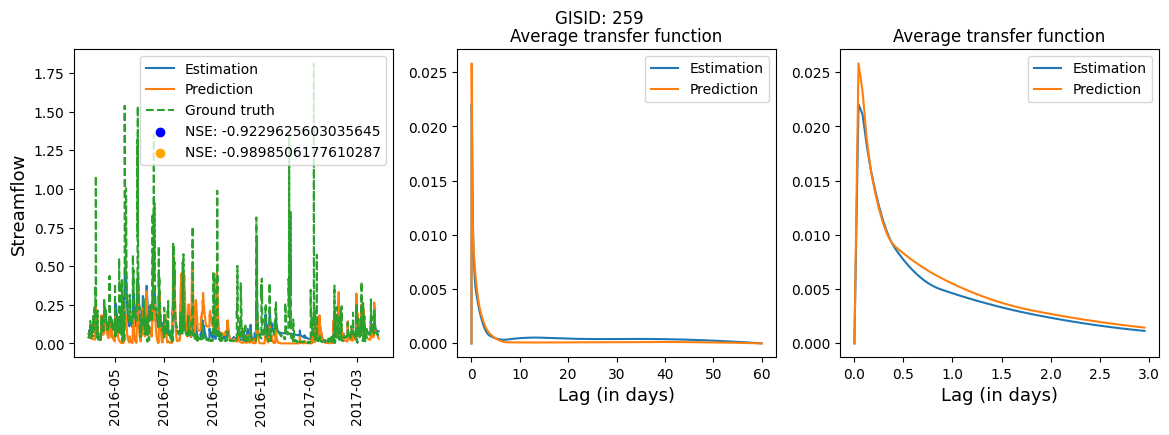

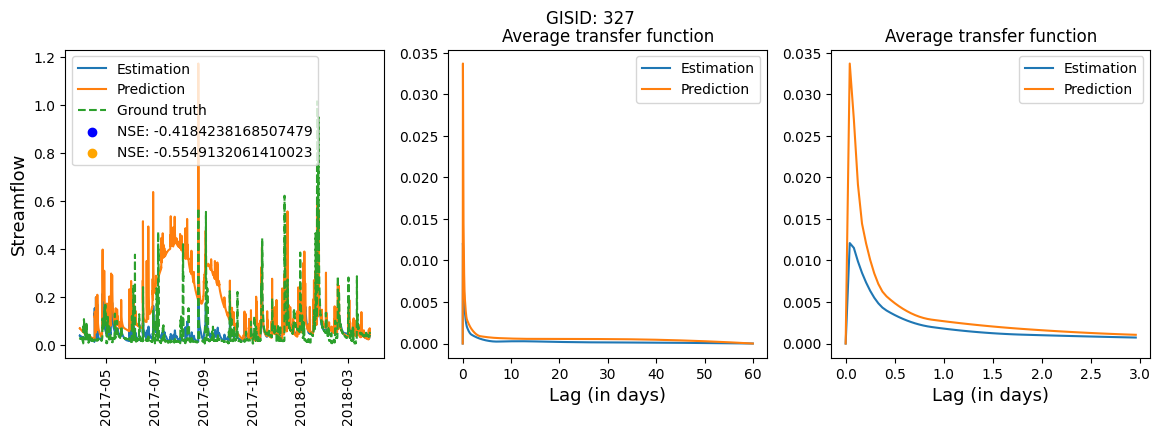

In [185]:
from datetime import datetime
for i in range(len(all_GISID)):
    GISID = all_GISID[i]
    with open(os.path.join(save_folder, 'GISID_{0}.pkl'.format(GISID)), 'rb') as handle:
        dico = pickle.load(handle)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
    dates = [datetime(int(year), 1, 1) + (datetime(int(year)+1, 1, 1) - datetime(int(year), 1, 1)) * (year - int(year)) for year in dico['dates']]

    ax1.plot(dates[-24*365:], dico['Qhat'][-24*365:], label='Estimation')
    ax1.plot(dates[-24*365:], dico['Qpred'][-24*365:], label='Prediction')
    ax1.plot(dates[-24*365:], dico['Qtrue'][-24*365:], label='Ground truth', linestyle='--')
    ax1.scatter([],[], c='blue', label='NSE: {0}'.format(GAMCR.nse( dico['Qhat'], dico['Qtrue'] )))
    ax1.scatter([],[], c='orange', label='NSE: {0}'.format(GAMCR.nse( dico['Qpred'], dico['Qtrue'] )))
    ax1.set_ylabel('Streamflow', fontsize=13)
    ax1.tick_params(axis='x', labelrotation=90)
    ax1.legend()
    ax2.set_title('Average transfer function')
    ax2.plot([i/24 for i in range(dico['Hhat'].shape[0])], dico['Hhat'], label='Estimation')
    ax2.plot([i/24 for i in range(dico['Hhat'].shape[0])], dico['Hpred'], label='Prediction')
    ax2.set_xlabel('Lag (in days)', fontsize=13)
    ax2.legend()
    ax3.plot([i/24 for i in range(24*3)], dico['Hhat'][:24*3], label='Estimation')
    ax3.plot([i/24 for i in range(24*3)], dico['Hpred'][:24*3], label='Prediction')
    ax3.set_xlabel('Lag (in days)', fontsize=13)
    ax3.legend()
    ax3.set_title('Average transfer function')
    plt.savefig(f'/mydata/watres/quentin/code/FLOW/hourly_analysis/RES_GAMCR/real_data_pred/LOO/figures/{GISID}.png',  dpi=250, bbox_inches='tight')
    fig.suptitle('GISID: {0}'.format(all_GISID[i]))

    plt.show()
    # df = pd.read_csv('/mydata/watres/quentin/code/FLOW/data/GISID2hourly_data_withPET/'+GISID+'.csv', sep=',')
    # plt.plot(df['t'], df['pet'])

# Partial dependence plots

- Visualize them for the non-stationary component
- Show partial dependence plots (on both streamflow and transfer function) + how it changes by increasing (or decreasing) by 1%, 5% and 10% a given catchment feature


## SHOULD WE DIVIDE BY THE PEAK OF THE TRANSFER FUNCTION TO HAVE A MORE INTERPRETABLE Z AXIS ?

In [31]:
with open('/mydata/watres/quentin/code/FLOW/hourly_analysis/splimodel/data_batch_real2_commonGAM_nonstationary/params.pkl', 'rb') as f:
    params = pickle.load(f)
     
from get_spline_basis import get_spline_basis
basis_values, knots_ref = get_spline_basis(params)

nfeat = basis_values.shape[0]
ages_max_x = [24*15,24*30,24*30*2,24*30*6,24*30*12,24*30*16,24*30*24]
ages_max_pet = [24*15,24*30,24*30*2,24*30*6]
nf = 5+len(ages_max_x)+len(ages_max_pet)
local_feat_names = ['trend', 'event precip', 'previous hour precip', 'cos time year', 'sin time year']
local_feat_names += ['weighted cumsum precip last {0} days'.format(int(age/24)) for age in ages_max_x]
local_feat_names += ['weighted cumsum PET last {0} days'.format(int(age/24)) for age in ages_max_pet] 

with open('/mydata/watres/quentin/code/FLOW/hourly_analysis/splimodel/data_batch_real2_commonGAM_nonstationary/gam.pkl', 'rb') as handle:
    GAM = pickle.load(handle)

idx_GISID = 7
gamcoeffs = np.load("/mydata/watres/quentin/code/FLOW/hourly_analysis/splimodel/data_batch_real2_commonGAM_nonstationary/gamcoeffs_{0}.npy".format(all_GISID[idx_GISID]))
gamcoeffs = gamcoeffs.reshape(9, len(gamcoeffs)//9)

PDP = {}
grids = {}
for l in range(9):
    GAM.coef_ = gamcoeffs[l,:]
    for i, term in enumerate(GAM.terms):
        if term.isintercept:
            continue
    
        XX = GAM.generate_X_grid(term=i)
        pdep = GAM.partial_dependence(term=i, X=XX, width=None)    
    
        if not(i in list(PDP.keys())):
            PDP[i] = np.dot(pdep.reshape(-1,1), basis_values[l,:].reshape(1,-1))
            grids[i] = XX[:, term.feature]
        else:
            PDP[i] += np.dot(pdep.reshape(-1,1), basis_values[l,:].reshape(1,-1))

ModuleNotFoundError: No module named 'get_spline_basis'

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


for i, term in enumerate(GAM.terms):
    if term.isintercept:
        continue
    x = grids[i]
    y = [j/24 for j in range(basis_values.shape[1])]
    X, Y = np.meshgrid(y, x)  # `plot_surface` expects `x` and `y` data to be 2D
    hf = plt.figure(i, figsize=(30,10))
    ha = hf.add_subplot(111, projection='3d')
    ha.plot_surface(X, Y, PDP[i])
    plt.xlabel('Lag (in days)')
    plt.ylabel('{0}'.format(local_feat_names[i]))
    
    plt.show()

# Showing RRDs at all sites

# Showing NRFs versus precipitation at all sites